In [3]:
import sys
sys.path.append('..')

from post_process_circle import *

results_folder = '/home/eidf079/eidf079/anovoa-ai4nz/codes/real-time-bias-aware-DA/results/circle/'

results = plot_loop_Nt_obs(results_folder,
                            run_name='run_online_training/',
                            _plot_MSE=True,
                            _plot_times=False)

dir = f'{results_folder}data_noise0.1gauss_smoothing0.1/run_online_training'

X_test_raw, X_test_true = load_test_data(folder=dir)

In [ ]:
len(result[0])


r_all, l_all = results

for r, l in result:

    for rr, ll in zip(r, l):

        plot_MSE_evolution(_ens,
                            X_test_raw,
                            X_test_true,
                            _truth,
                            reconstructed_data=all_reconstructed_data,
                            tiks=labels)



In [1]:
import sys
sys.path.append('..')
from essentials.plotResults import *

from plor_m_loop import plot_m_ur_loop


# plot_m_ur_loop()


from main_cylinder import load_from_pickle_file, set_working_directories

data_folder, results_folder = set_working_directories('circle', current_dir='..')[:2]


folder = f'data_noise0.1gauss_smoothing0.1/'
case_filename = f'{results_folder}{folder}POD4_ESN40_Ntrain240'


case = load_from_pickle_file(case_filename)



print('Loaded case', case)

Loaded case <essentials.models_datadriven.POD_ESN object at 0x7f8d70b15810>


[create] state shape = (25, 44, 1)


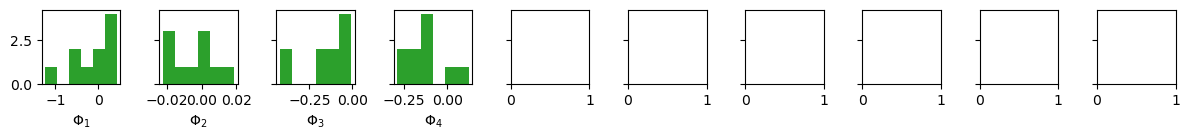

In [3]:
from essentials.create import create_ensemble
model = case.copy()
#  ======================== Define the measurements ============================  #
# N_sensors = 0 # Number of sensors. if 0, measure POD coefficients

model.reset_sensors(N_sensors=1,
                    domain_of_measurement=[-1, 1,4,7], 
                    down_sample_measurement=(10, 40),
                    qr_selection=True
                    )

model.update_reservoir = False # Important

# Define ensemble
ensemble =  create_ensemble(model=model,
                            filter='EnSRKF', 
                            m=10,
                            std_psi=5.,
                            model_bias=None,
                            # est_a=['Wout'],
                            # est_Wout = 3,
                            # std_a=0.2
                            )

plot_ensemble(ensemble, max_modes=10)


In [4]:

from main_cylinder import dataAssimilation_bias_blind, set_truth
# %run 'main_cylinder.py'


X_filter, X_filter_true = load_from_pickle_file(f'test_data')

truth = set_truth(model, X_filter, X_filter_true)


for update_reservoir in [False]:

    model.update_reservoir = update_reservoir # Important
    
    # Define ensemble
    ensemble =  create_ensemble(model=model,
                                filter='EnSRKF', 
                                m=10,
                                std_psi=5.,
                                model_bias=None,
                                # est_a=['Wout'],
                                # est_Wout = 3,
                                # std_a=0.2               
                                )

    #  ===================== Run simulation ============================  #

    # Perform assimilation
    filter_ens = dataAssimilation_bias_blind(ensemble=ensemble,
                                            std_obs=0.01,
                                            **truth)

[create] state shape = (25, 44, 1)

 ------------------ /Users/anovoama/Library/CloudStorage/OneDrive-ImperialCollegeLondon/My codes/real-time-bias-aware-DA/DEV-real-time-bias-aware-DA/results/circle//data_noise0.1gauss_smoothing0.1/POD4_ESN40_Ntrain240 Model Parameters ------------------ 
	 N_modes = 4
	 N_units = 40
	 N_wash = 5
	 Nq = 2
	 measure_modes = False
	 rho = 0.976236
	 sigma_in = 0.889815
	 update_reservoir = False
	 update_state = True
	 upsample = 1

 -------------------- ASSIMILATION PARAMETERS -------------------- 
 	 Filter = EnSRKF 
 	 Bias = None 
 	 m = 10 
 	 Time steps between analysis = 25 
 	 Inferred params = [] 
 	 Inflation = 1.002 
 	 Reject Inflation = 1.002 
 	 Ensemble std(psi0) = 5.0
 	 Ensemble std(alpha0) = 0.001
 	 Number of analysis steps = 19, t0=1.0, t1=5.5
Elapsed time to first observation: 0.009089946746826172 s
Assimilation progress: 
	0 % 5% 11% 16% 21% 26% 32% 37% 42% 47% 100% ----------------

Elapsed time during assimilation: 0.050769329071

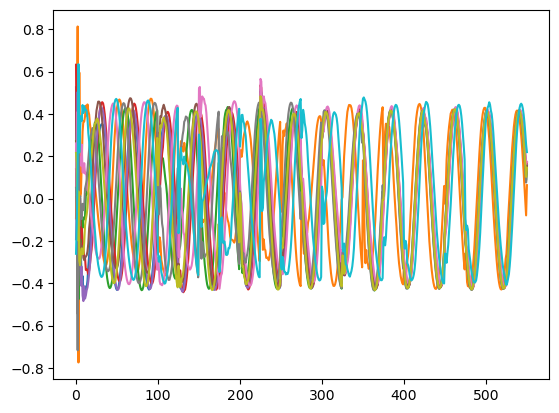

In [7]:
plt.plot(ensemble.hist[:, ensemble.N_dim+1])

In [6]:
ensemble.hist.shape

(551, 44, 10)

In [8]:

from essentials.Util import load_from_pickle_file, set_working_directories, interpolate
results_folder = set_working_directories('circle', current_dir='..')[1]  

In [ ]:

print('Loading files from:', results_folder)




data_name = 'data_noise0.1gauss_smoothing0.1/'
run_name = 'run_250211-1823/'



file = f'{results_folder}{data_name}{run_name}/test_data'
X_test_raw, X_test_true = load_from_pickle_file(file)




file = f'{results_folder}{data_name}{run_name}Nq_0/results'

filter_ens, truth = load_from_pickle_file(file)


filter_ens.print_model_parameters()


Loading files from: /Users/anovoama/Library/CloudStorage/OneDrive-ImperialCollegeLondon/My codes/real-time-bias-aware-DA/DEV-real-time-bias-aware-DA/results/circle/

 ------------------ /Users/anovoama/Library/CloudStorage/OneDrive-ImperialCollegeLondon/My codes/real-time-bias-aware-DA/DEV-real-time-bias-aware-DA/results/circle//data_noise0.1gauss_smoothing0.1/POD4_ESN40_Ntrain240 Model Parameters ------------------ 
	 N_modes = 4
	 N_units = 40
	 N_wash = 5
	 Nq = 4
	 measure_modes = True
	 rho = 0.976236
	 sigma_in = 0.889815
	 update_reservoir = True
	 update_state = True
	 upsample = 1


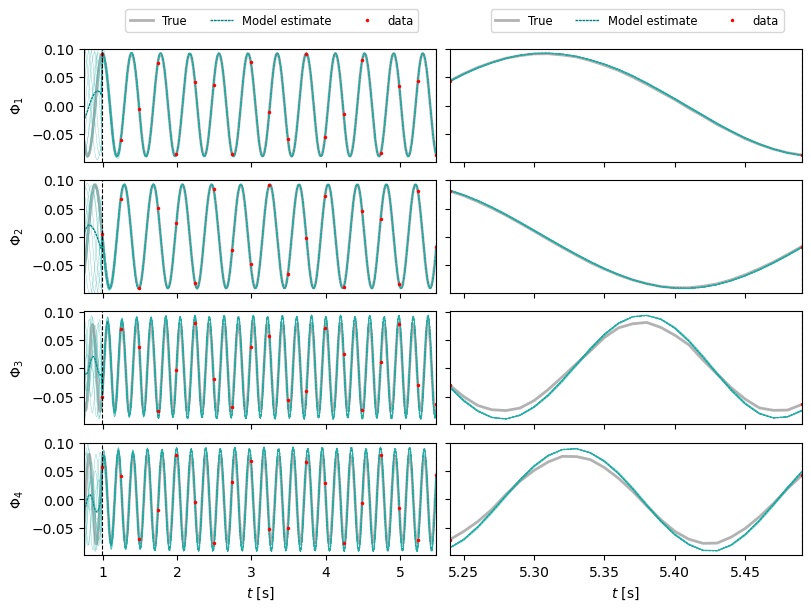

In [10]:
# Plot results
plot_observables(filter_ens, truth=truth, plot_states=True, plot_ensemble_members=1)

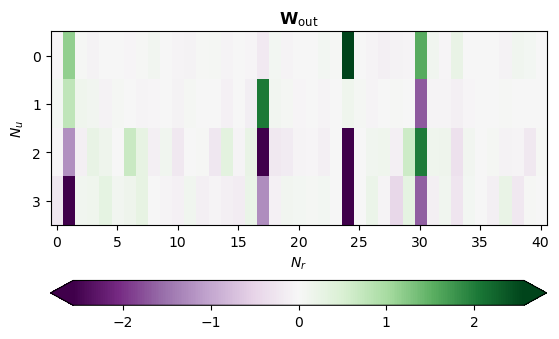

In [ ]:
filter_ens.plot_Wout()

In [6]:
print([getattr(filter_ens, attr) for attr in ['N', 'Nphi', 'Na', 'Nq', 'N_modes', 'N_units']])
print(filter_ens.obs_labels)
print(len(filter_ens.state_labels))

[46, 44, 0, 2, 4, 40]
['${u_x}_0$', '${u_y}_0$']
44


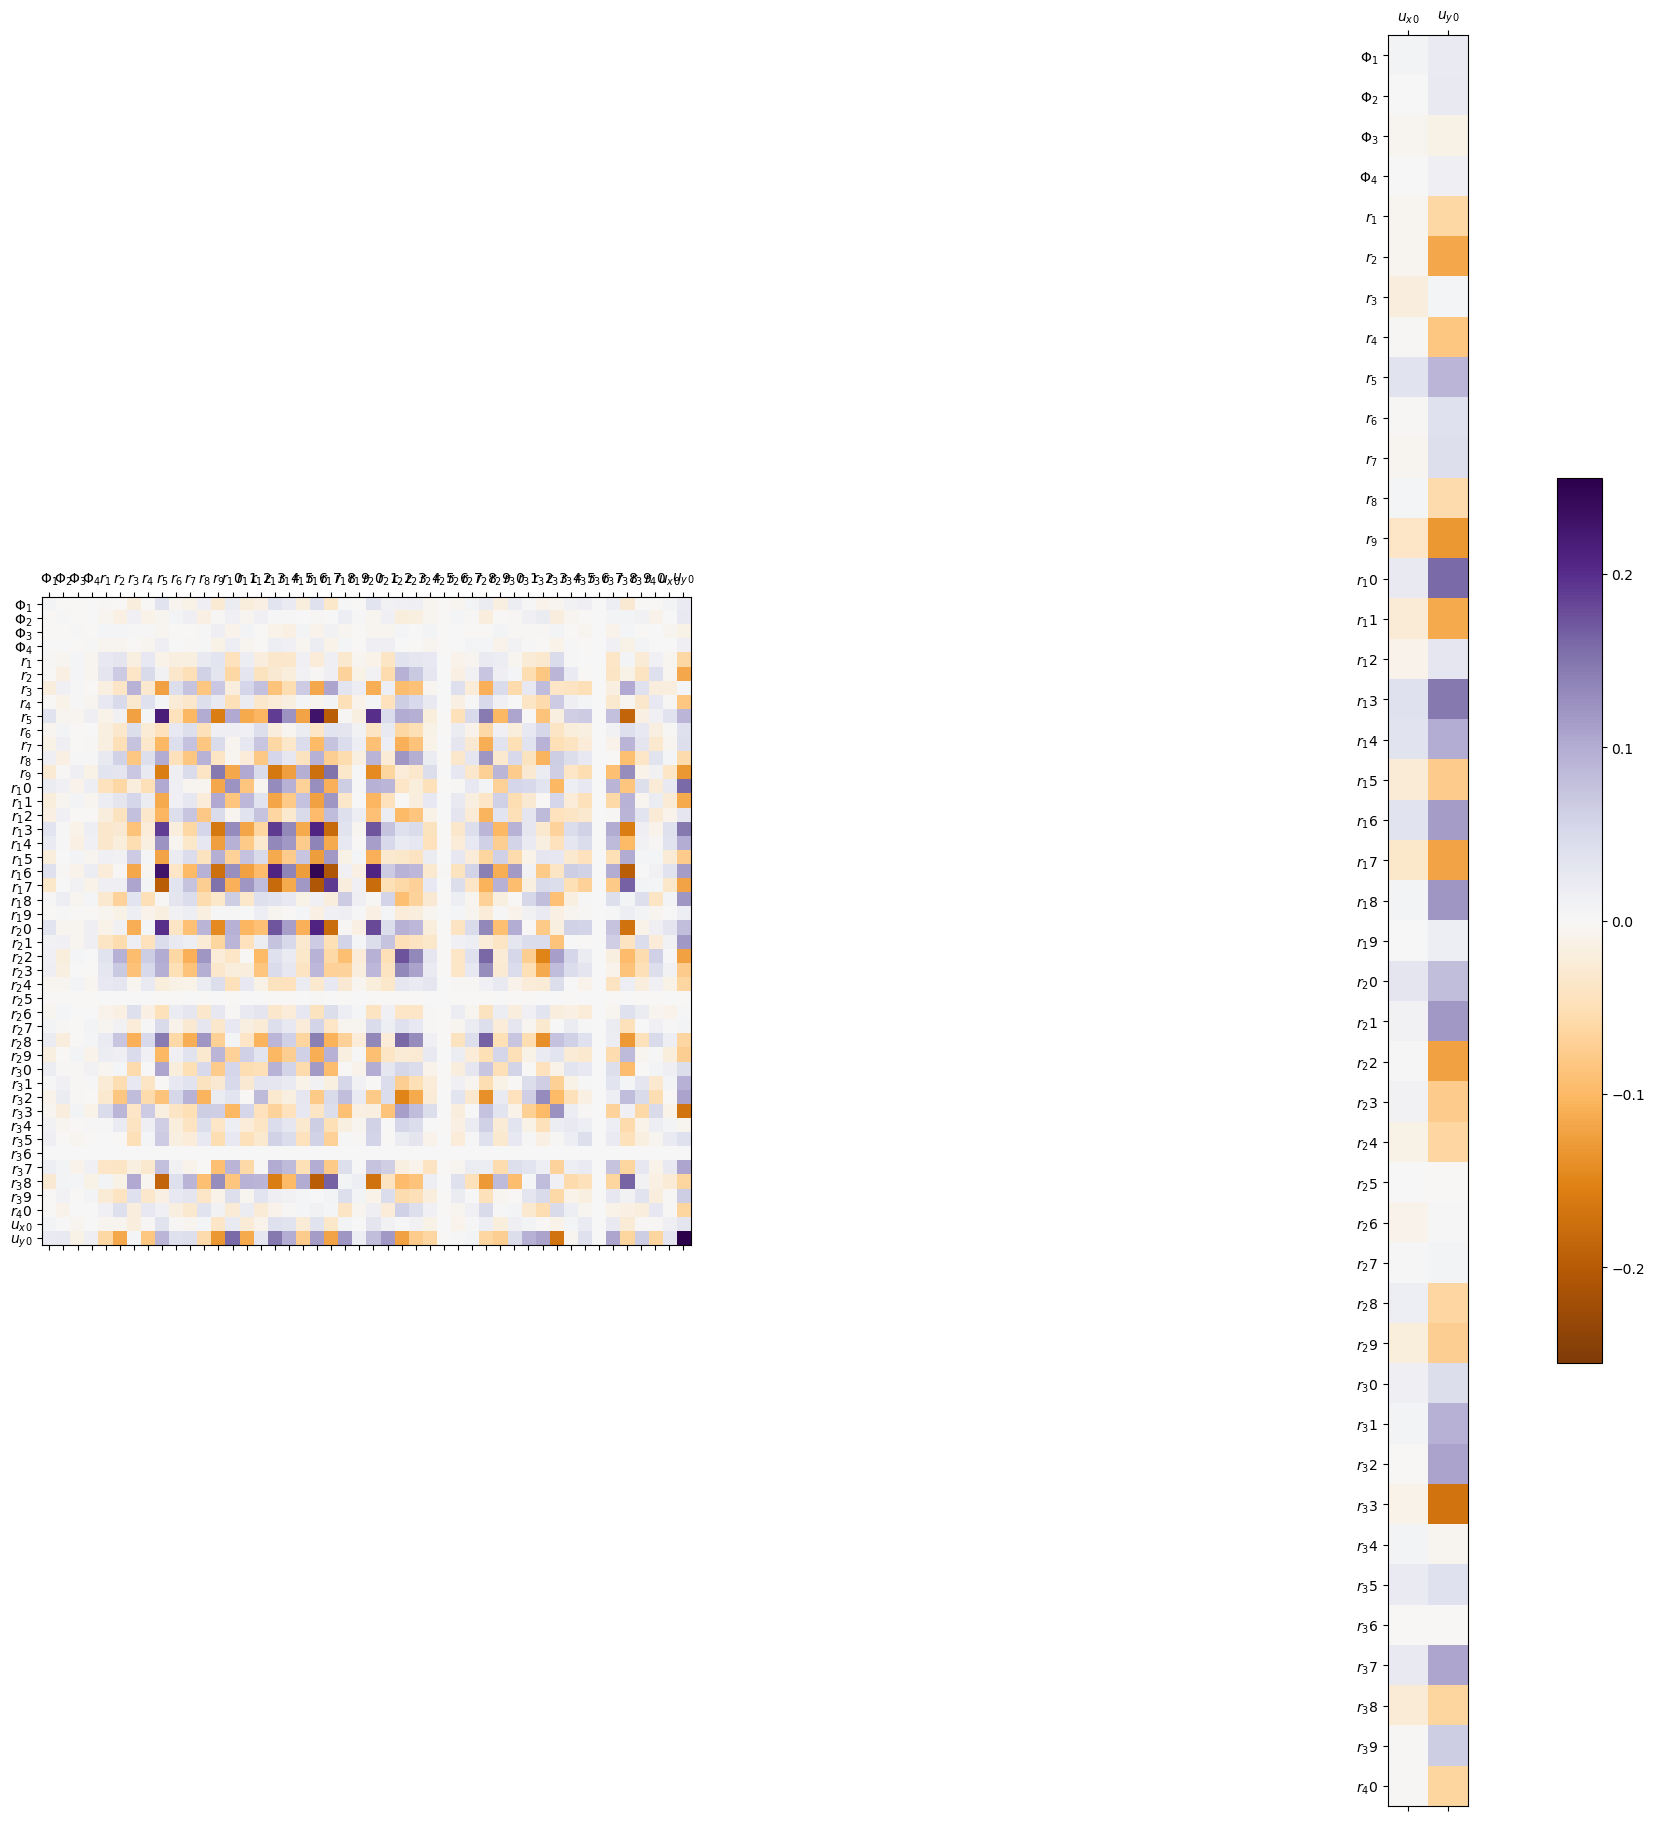

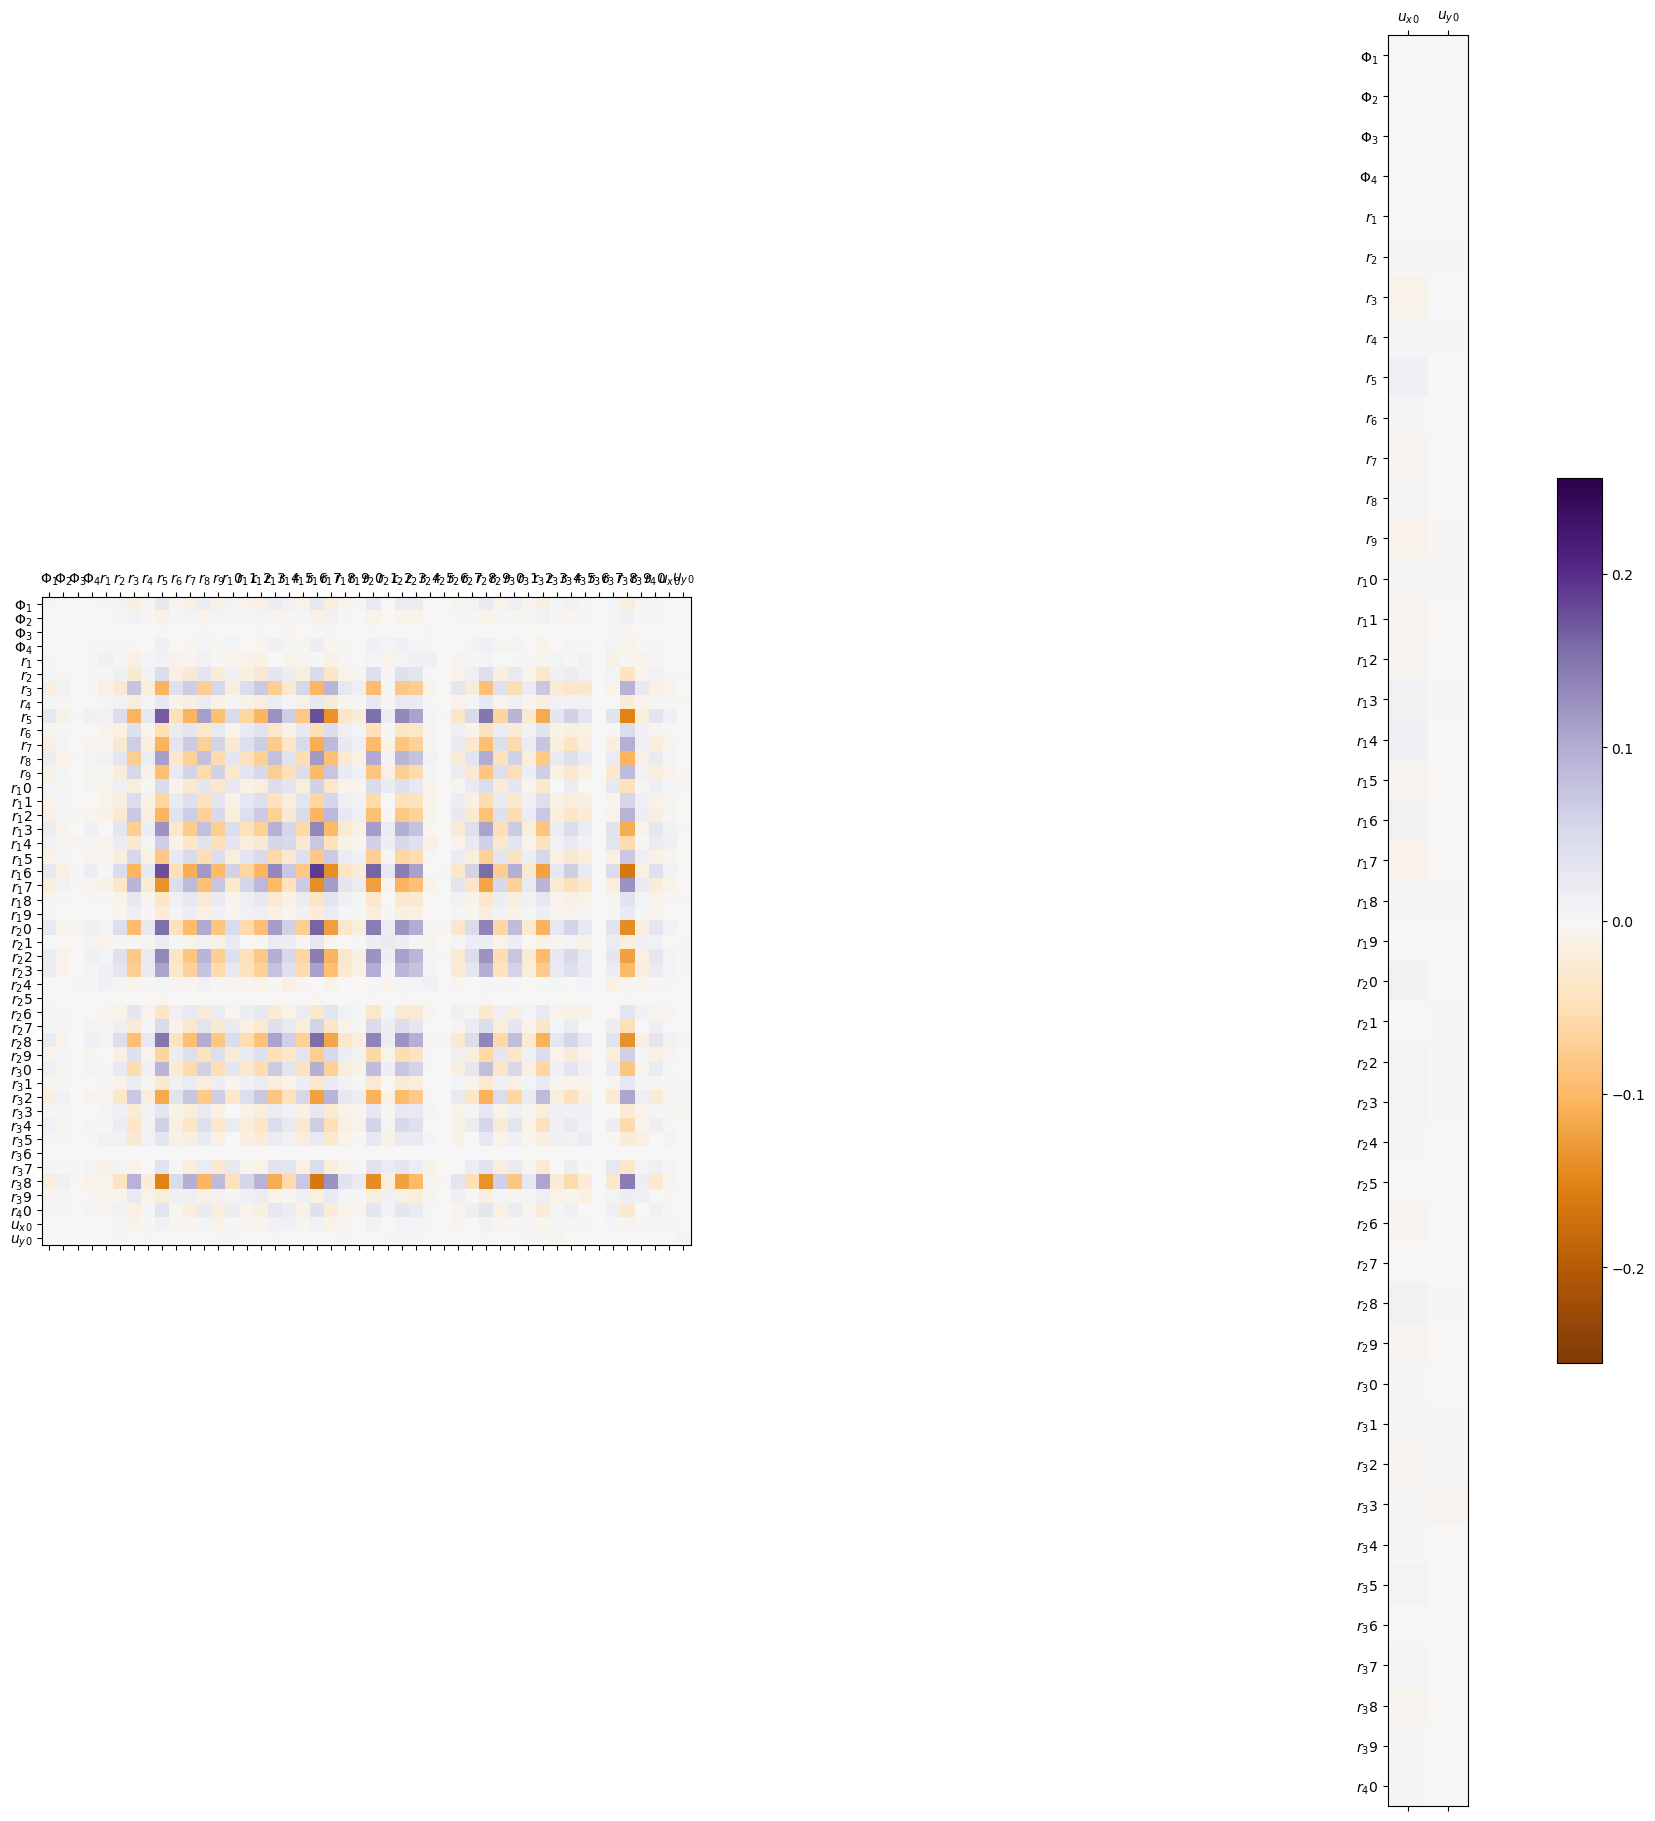

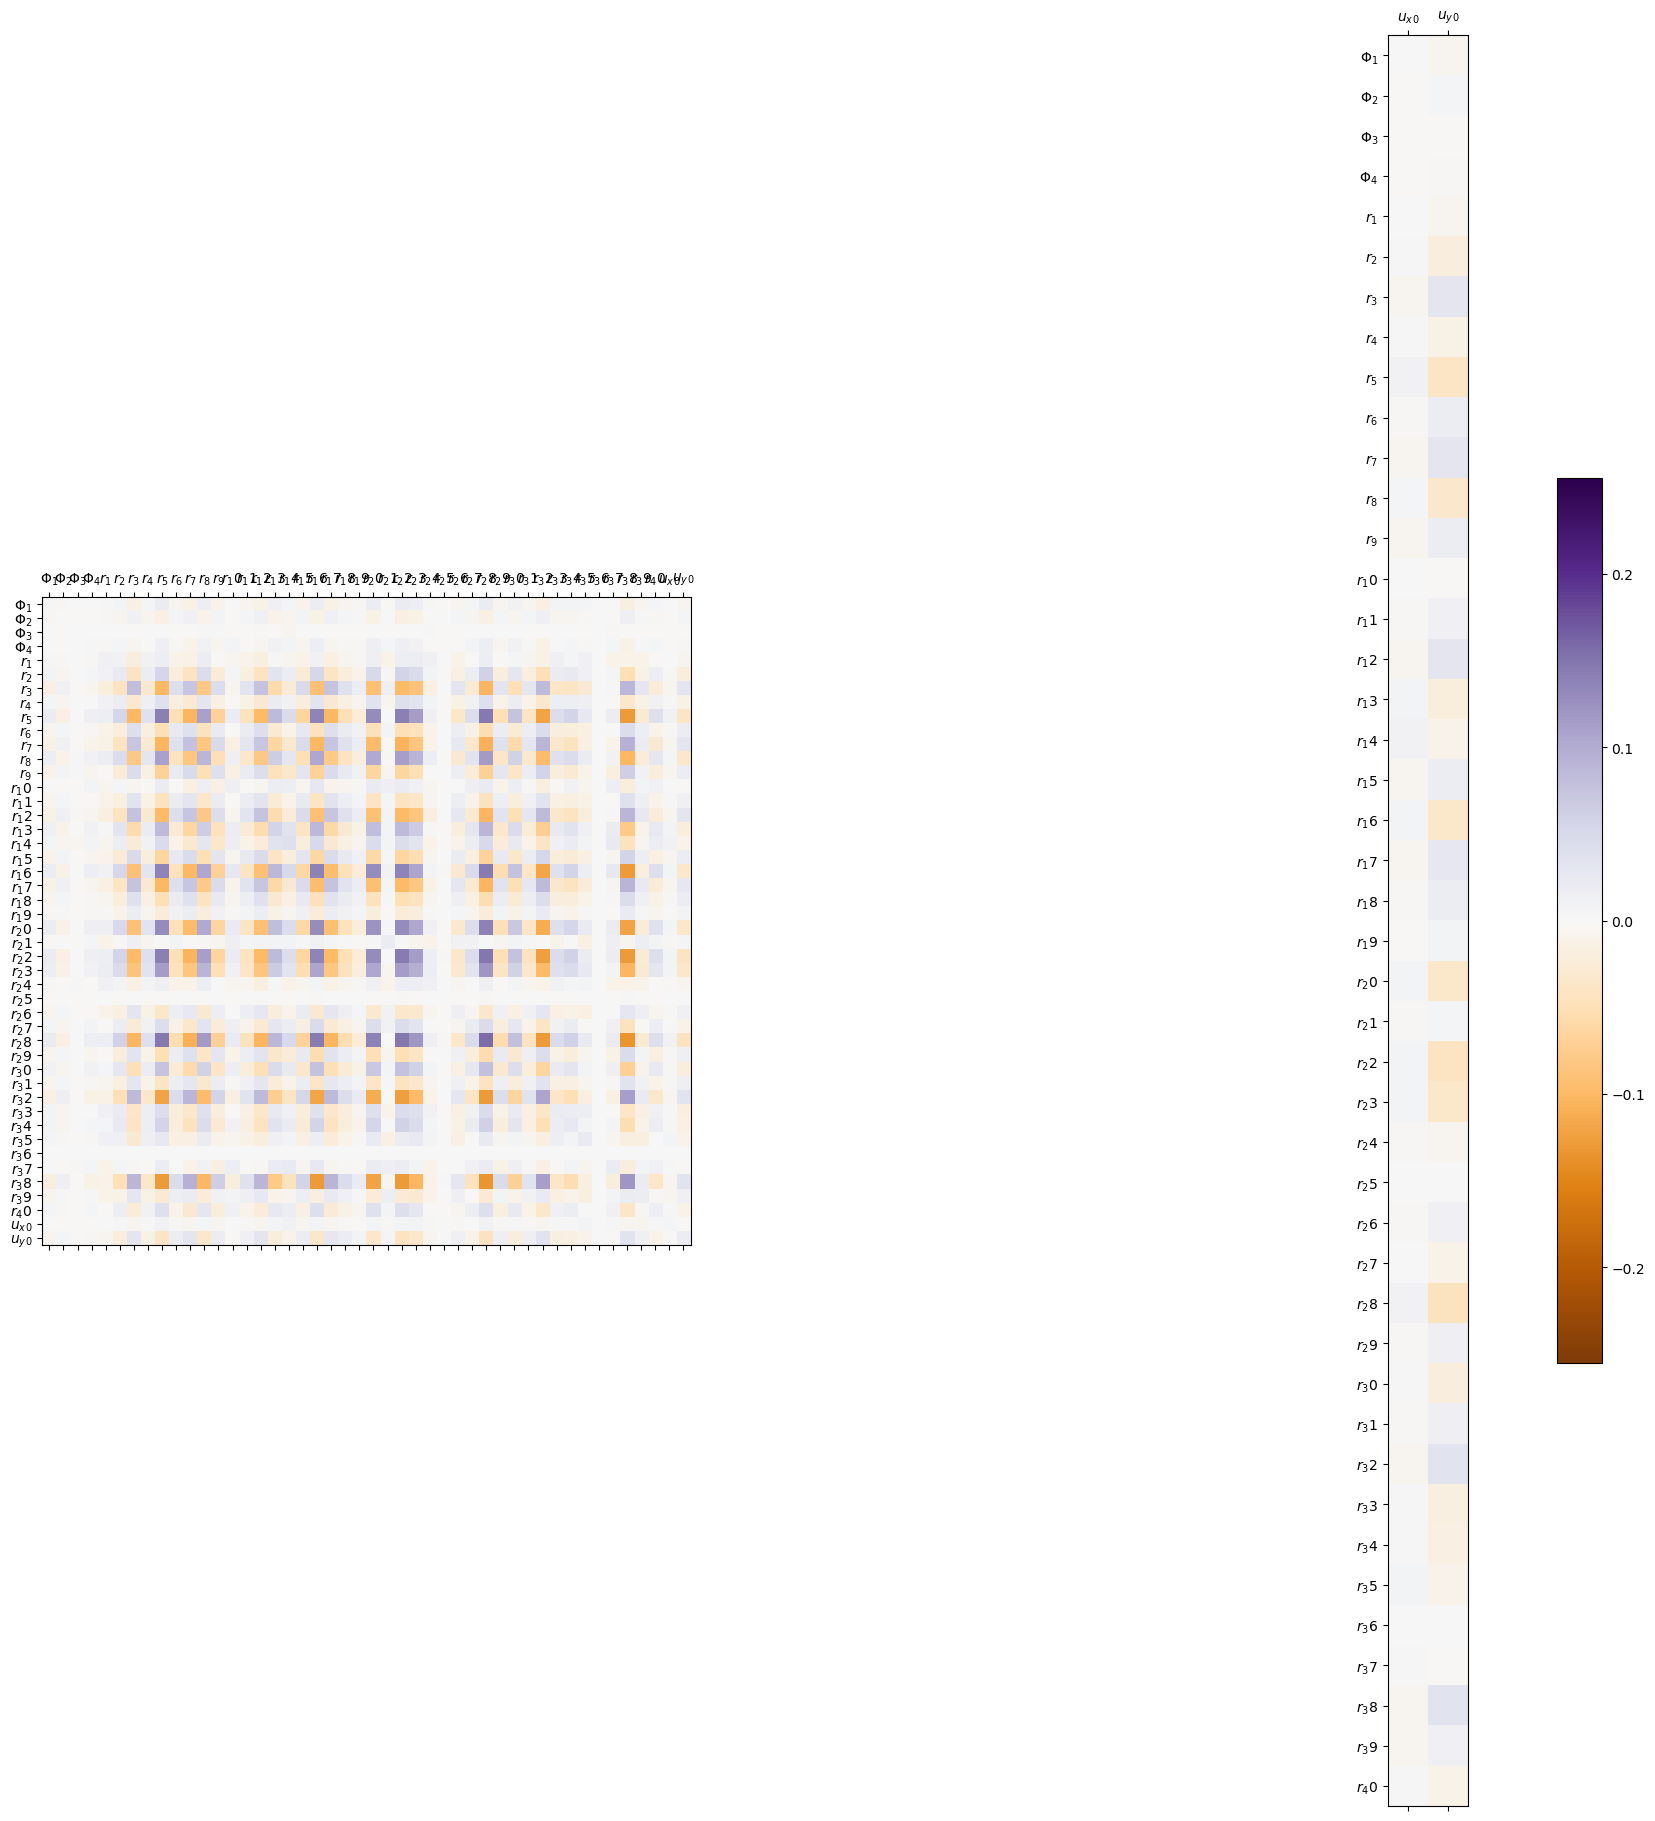

In [7]:
t_hist = filter_ens.hist_t
t_obs = truth['t_obs']


obs_idx = np.searchsorted(t_hist, t_obs)



plot_covariance(filter_ens, idx=[obs_idx[0]-1, obs_idx[0], obs_idx[0]+1])

# from essentials.Util import save_figs_to_pdf
# save_figs_to_pdf('covs')

In [ ]:
# %run '../essentials/plotResults.py'


# plot_MSE_evolution(filter_ens,
#                     X_test_raw,
#                     X_test_true,
#                     truth, 
#                     max_lines=5)

In [9]:
# %run '../essentials/plotResults.py'


# plot_MSE_evolution(filter_ens,
#                        X_test_raw,
#                        X_test_true,
#                        truth)
# plt.suptitle(f'N_sensors={filter_ens.N_sensors}')


# save_figs_to_pdf('MSEs.pdf')

In [10]:
from essentials.Util import save_figs_to_pdf
print('Loading files from:', results_folder)

data_name = 'data_noise0.1gauss_smoothing0.1/'
run_name = 'run_250211-1823/'


all_reconstructed_data = []
labels = []

for nq in range(5):

    file = f'{results_folder}{data_name}{run_name}Nq_{nq}/results'
    _ens = load_from_pickle_file(file)[0]

    forecast_coefficients = _ens.get_POD_coefficients(Nt=0)
    reconstructed_data = _ens.reconstruct(Phi=np.mean(forecast_coefficients, axis=-1))

    all_reconstructed_data.append(reconstructed_data)
    labels.append(f'N_sensors = {_ens.N_sensors}')

    # Plot single case
    plot_MSE_evolution(_ens,
                        X_test_raw,
                        X_test_true,
                        truth)
    plt.suptitle(f'N_sensors={_ens.N_sensors}')


plot_MSE_evolution(filter_ens,
                       X_test_raw,
                       X_test_true,
                       truth,
                       reconstructed_data=all_reconstructed_data,
                       tiks=labels)

save_figs_to_pdf(f'{results_folder}{data_name}{run_name}MSEs.pdf')
    


Loading files from: /Users/anovoama/Library/CloudStorage/OneDrive-ImperialCollegeLondon/My codes/real-time-bias-aware-DA/DEV-real-time-bias-aware-DA/results/circle/


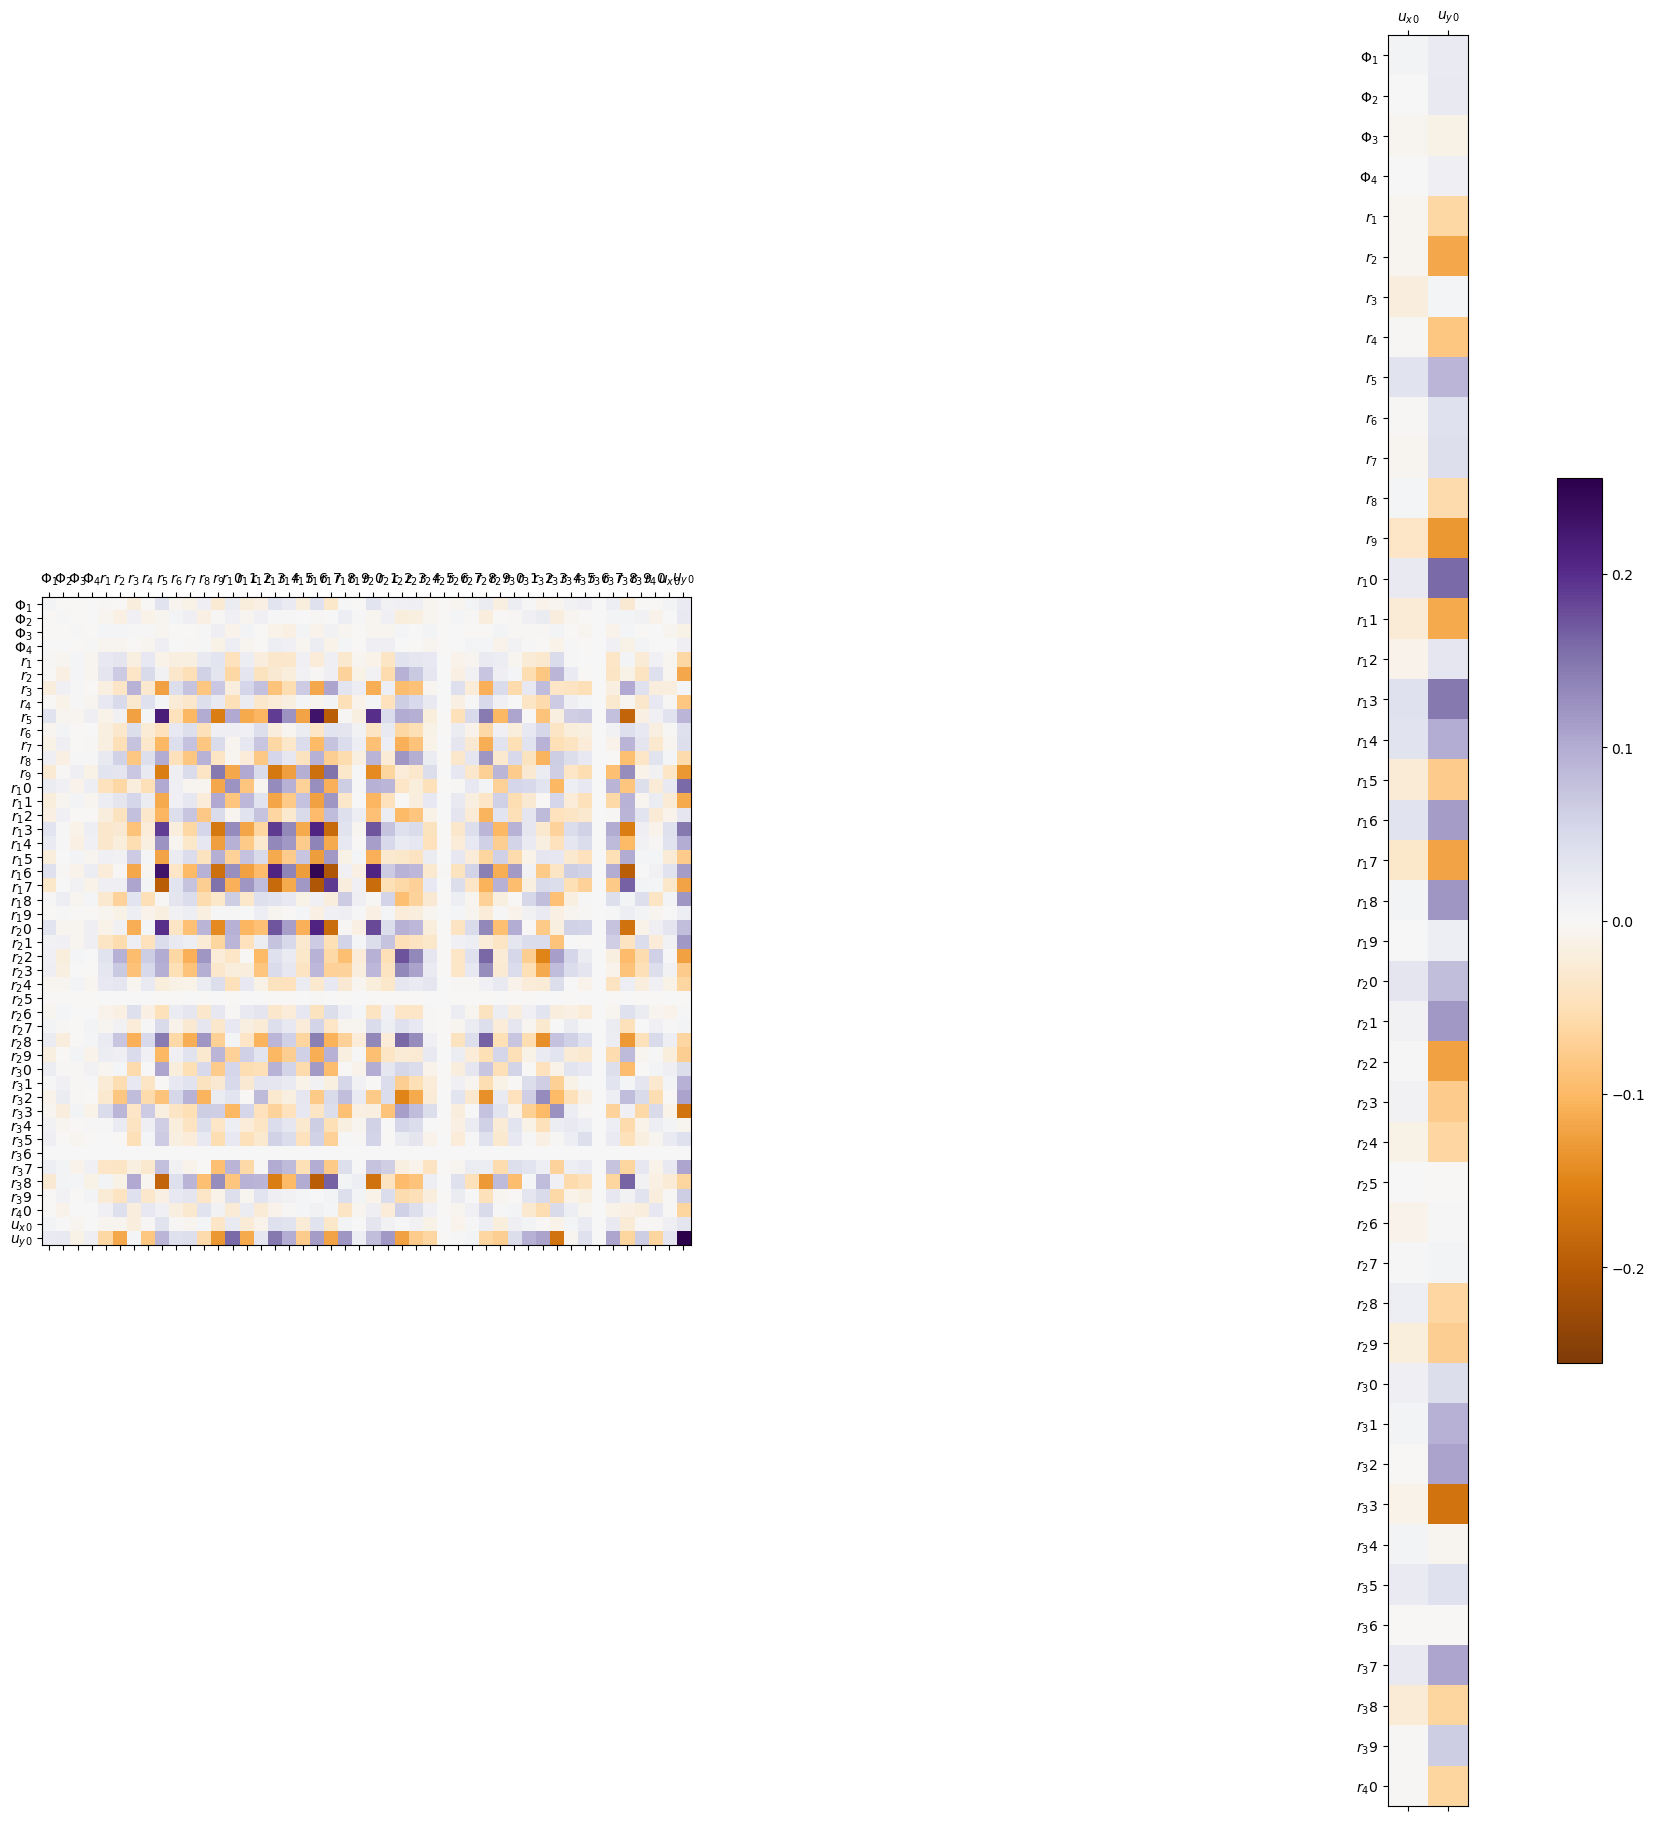

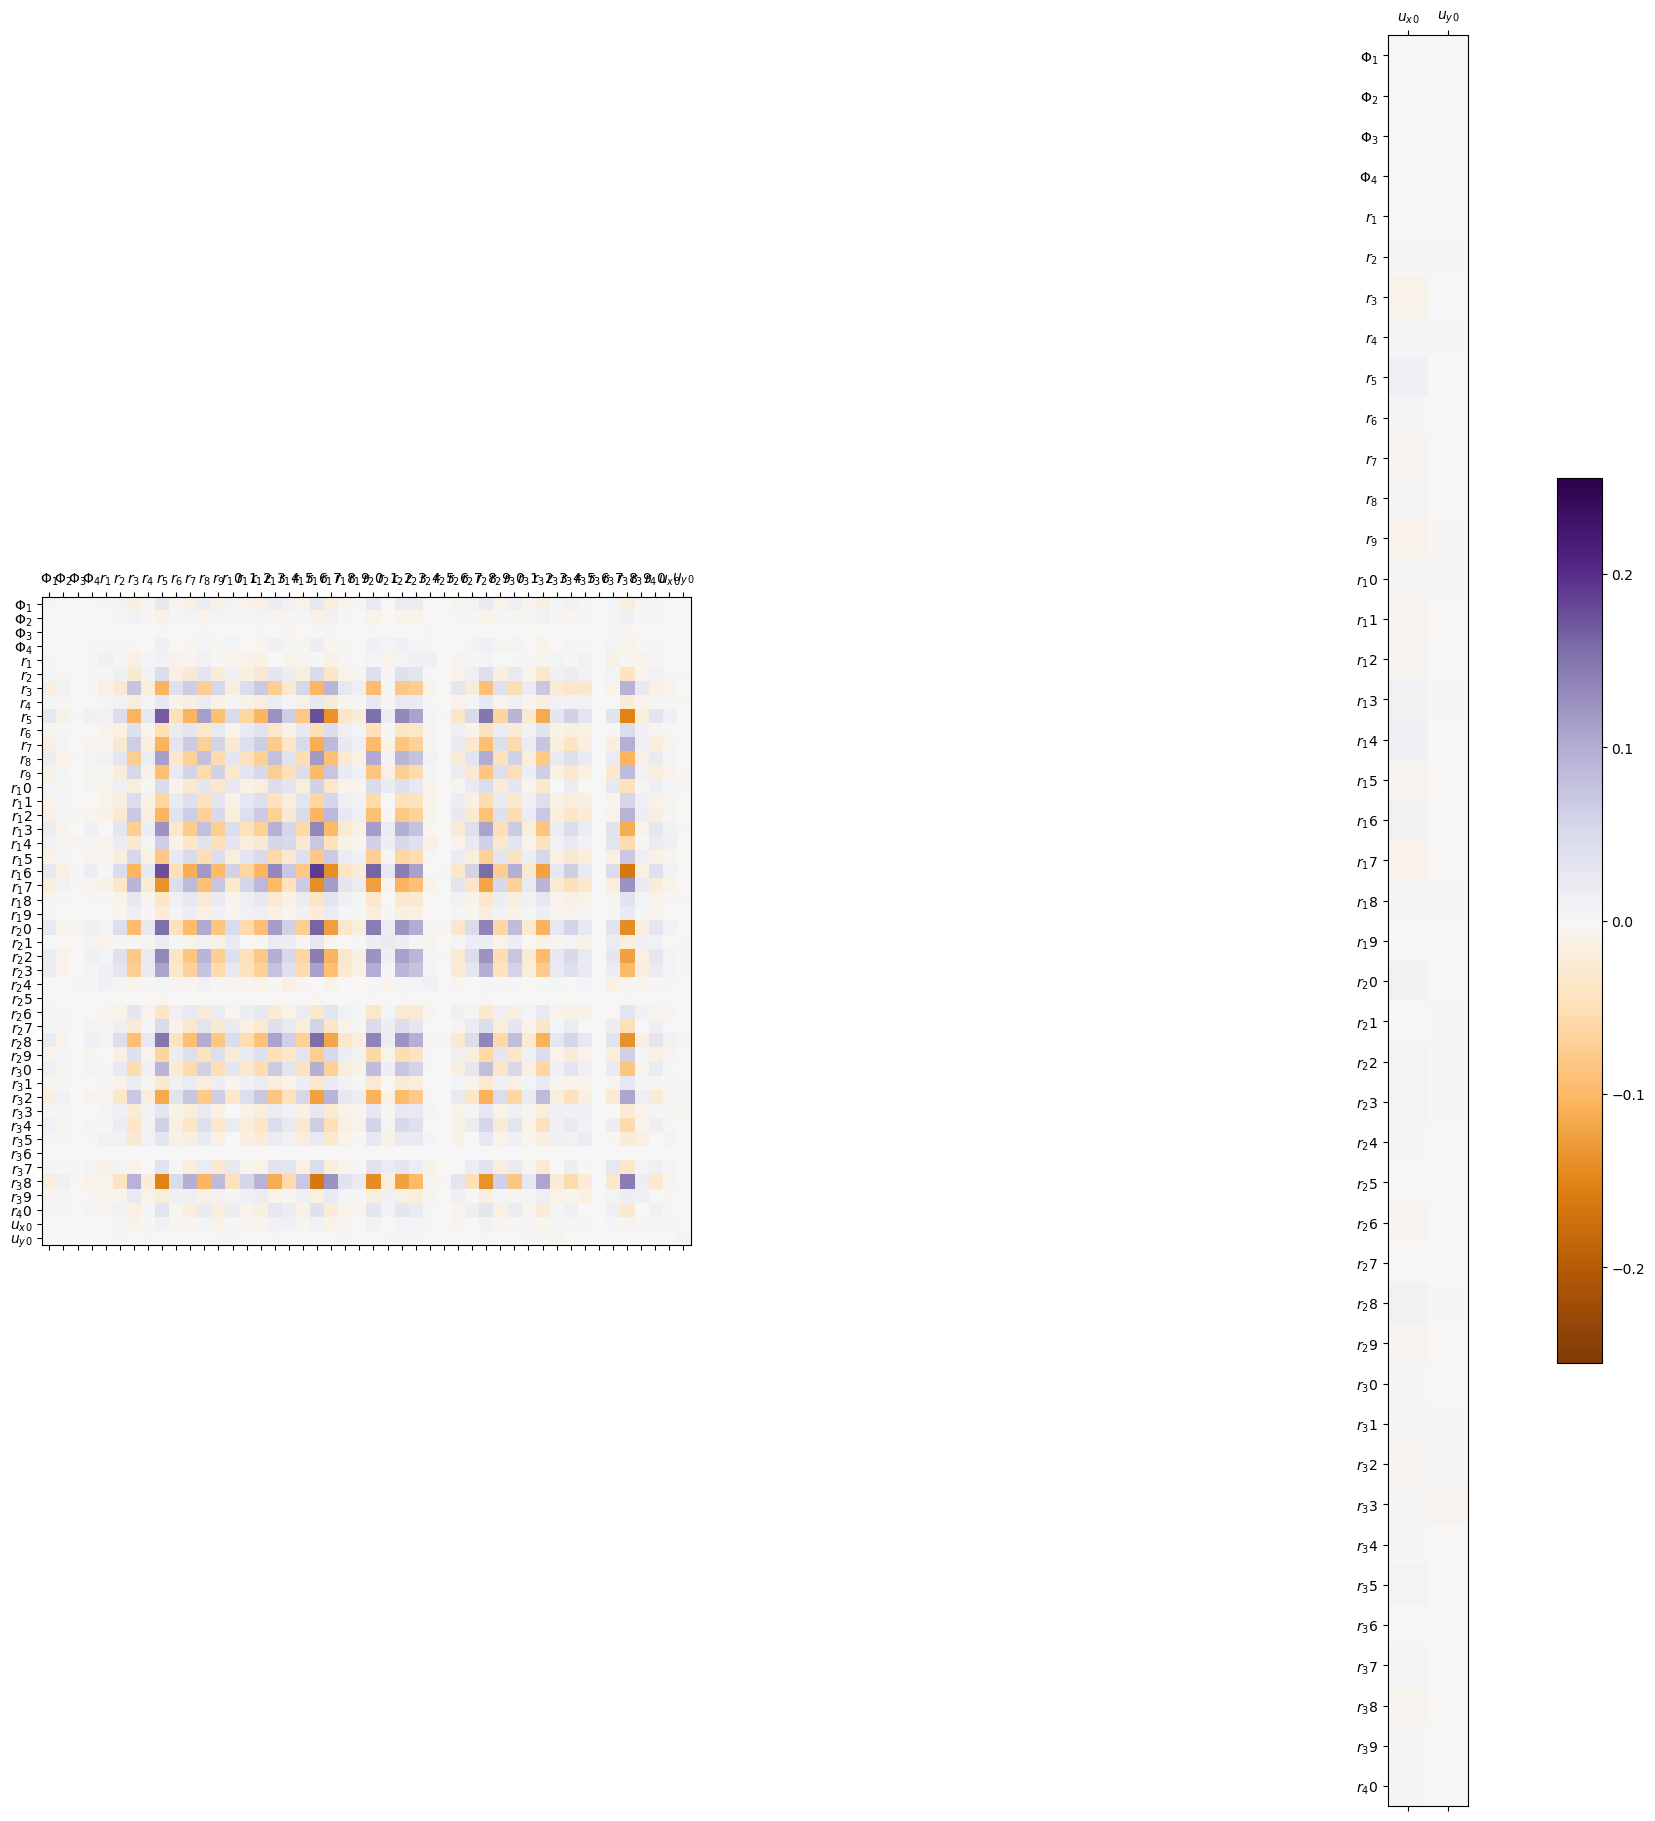

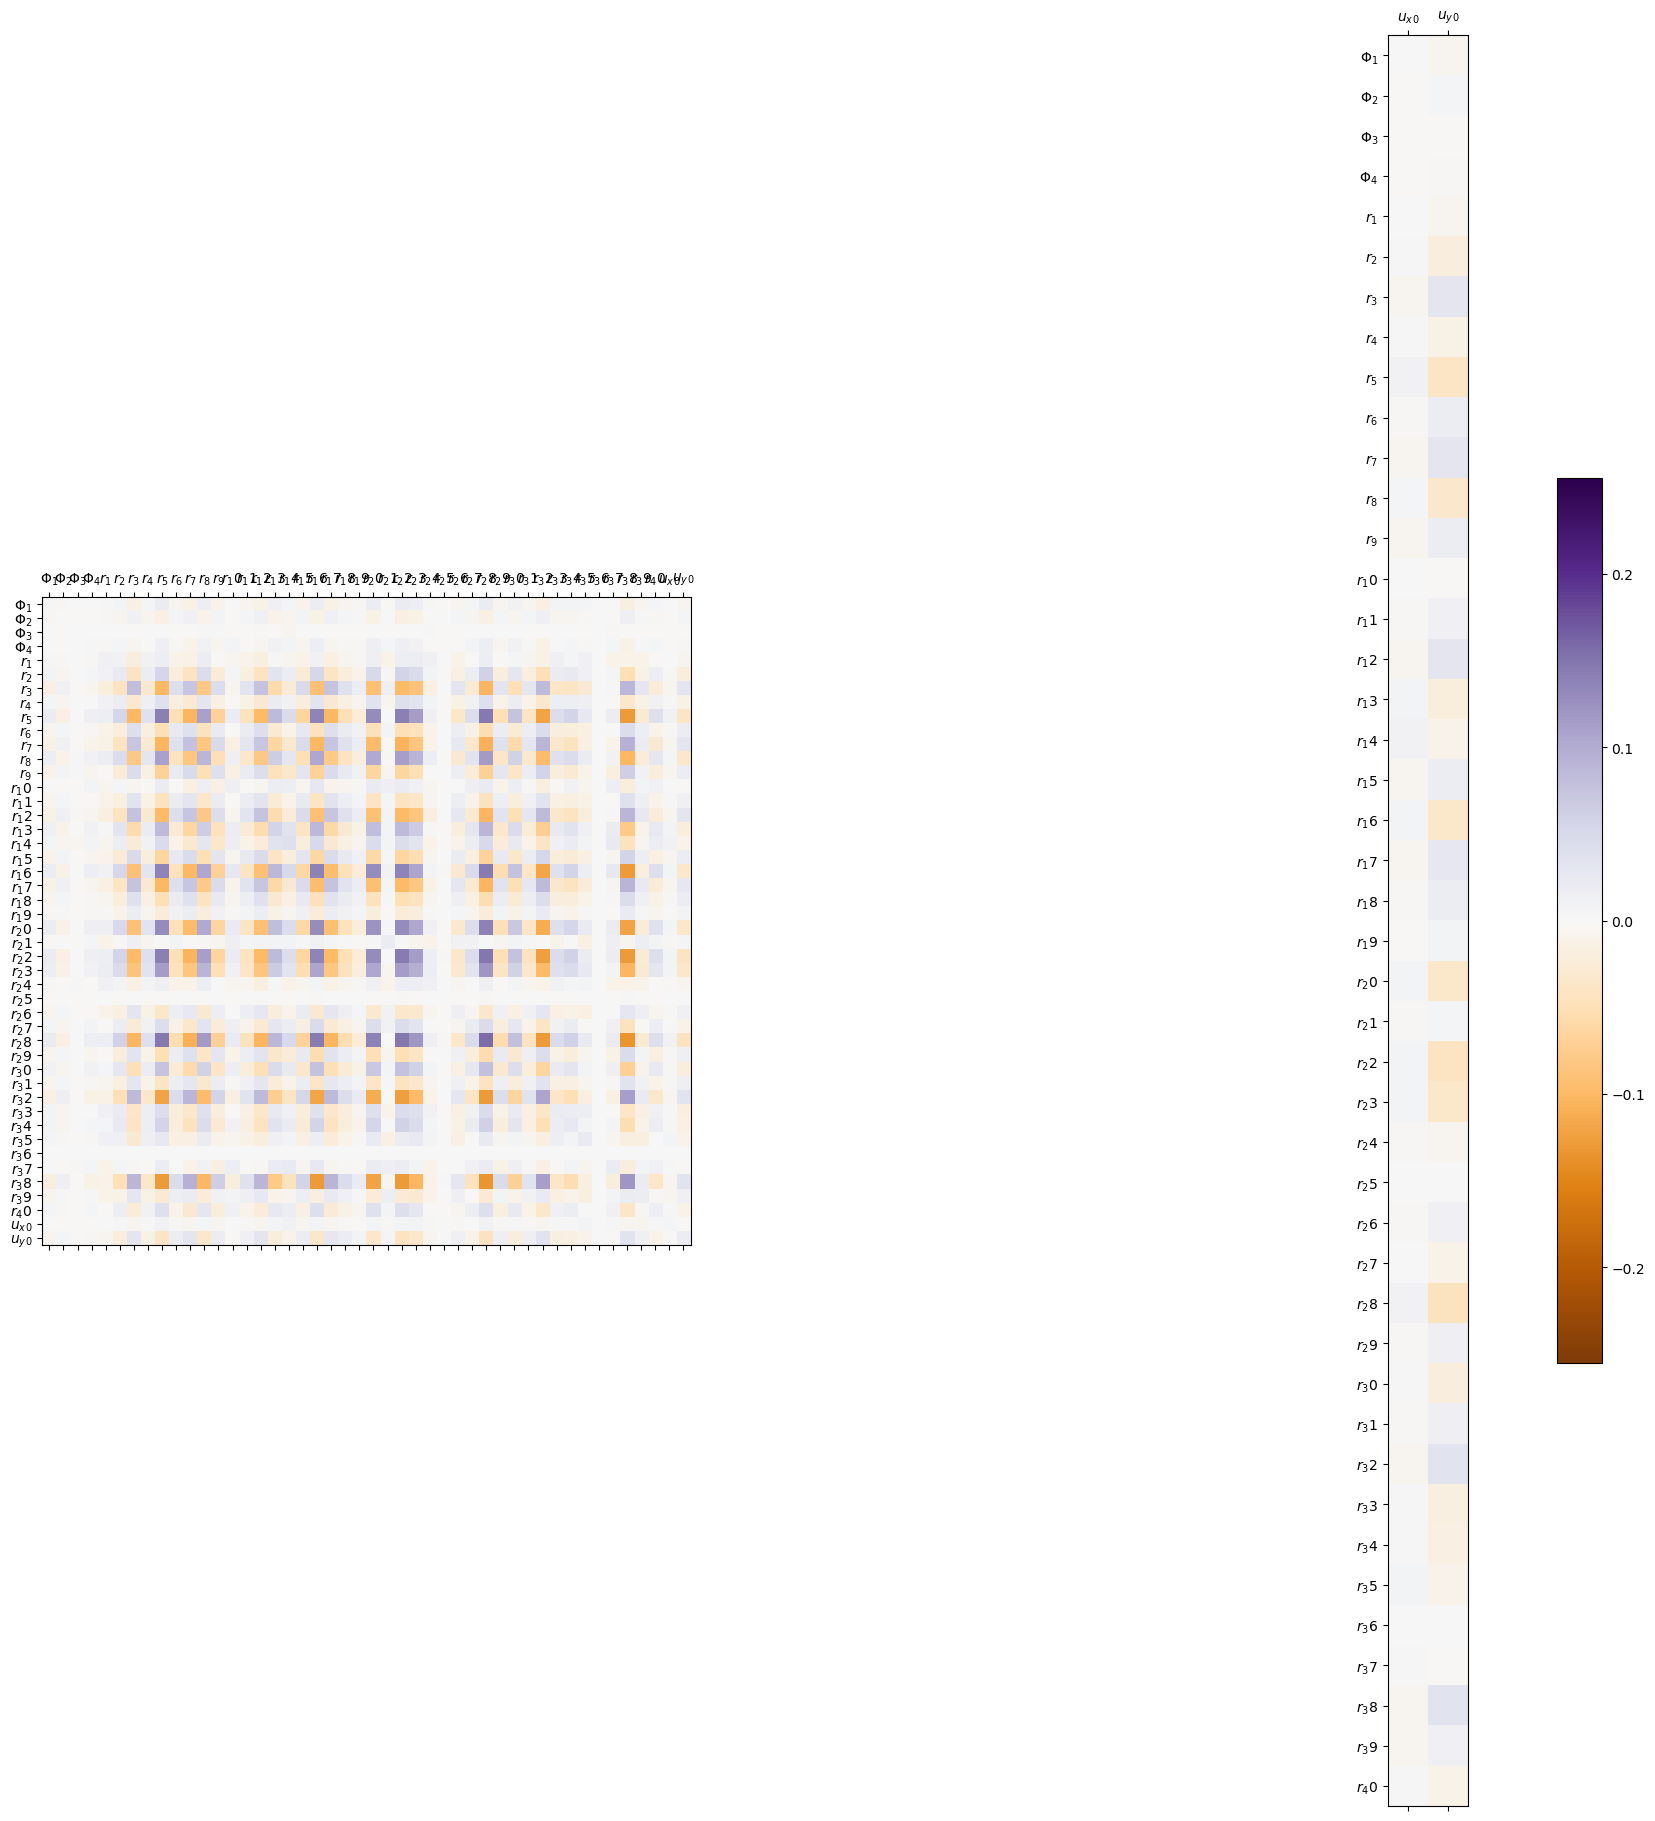

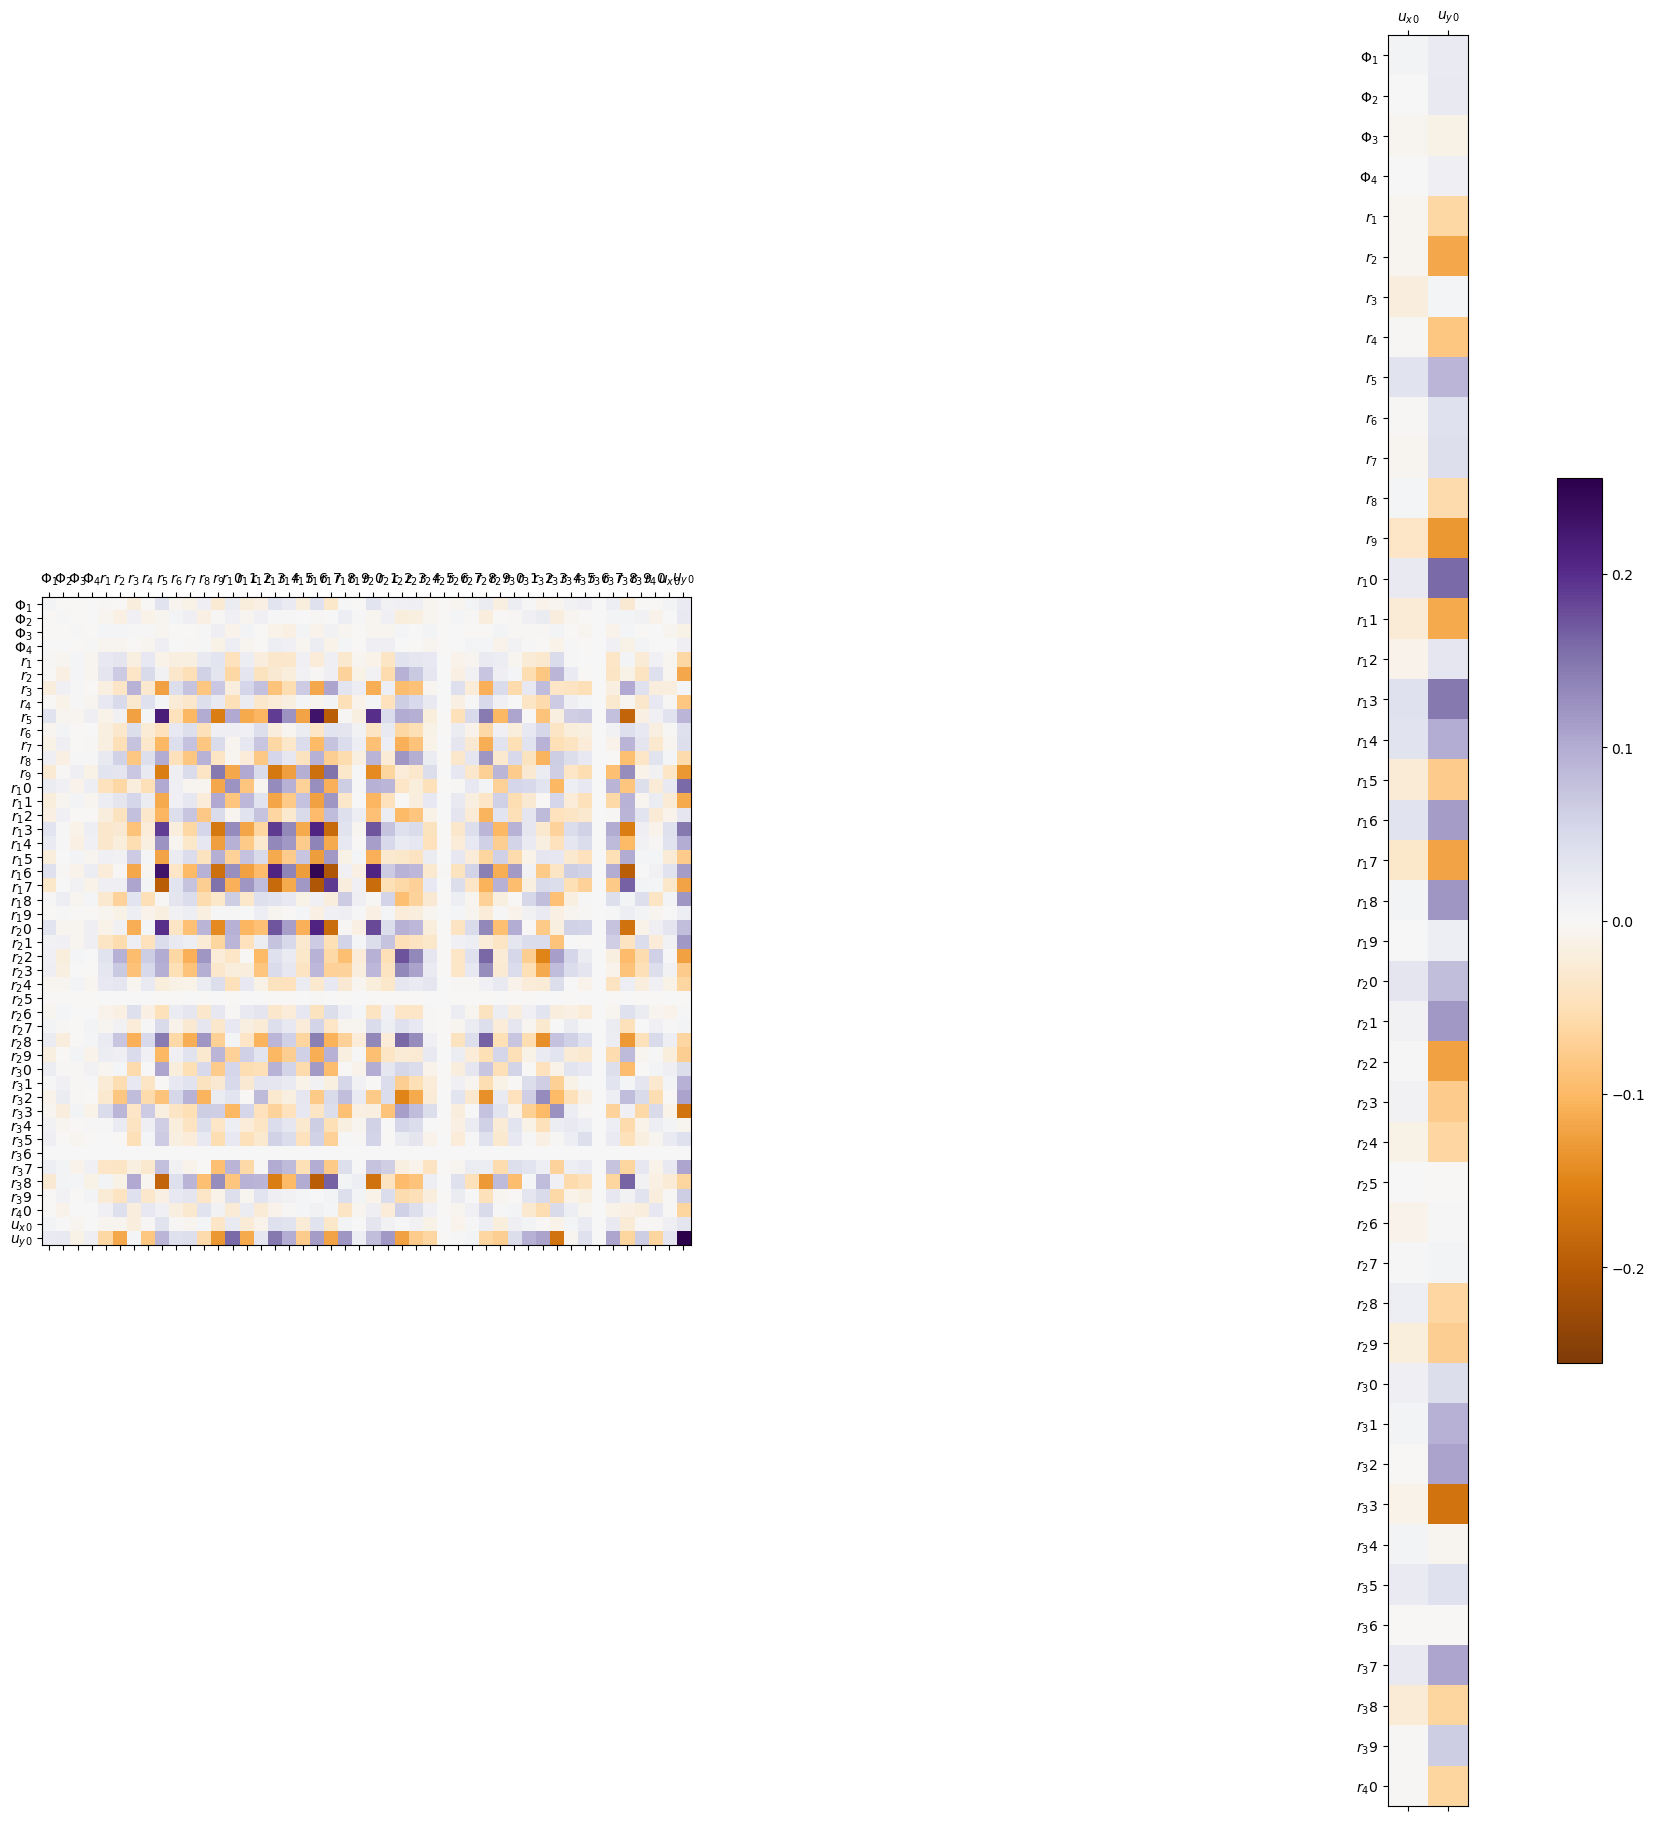

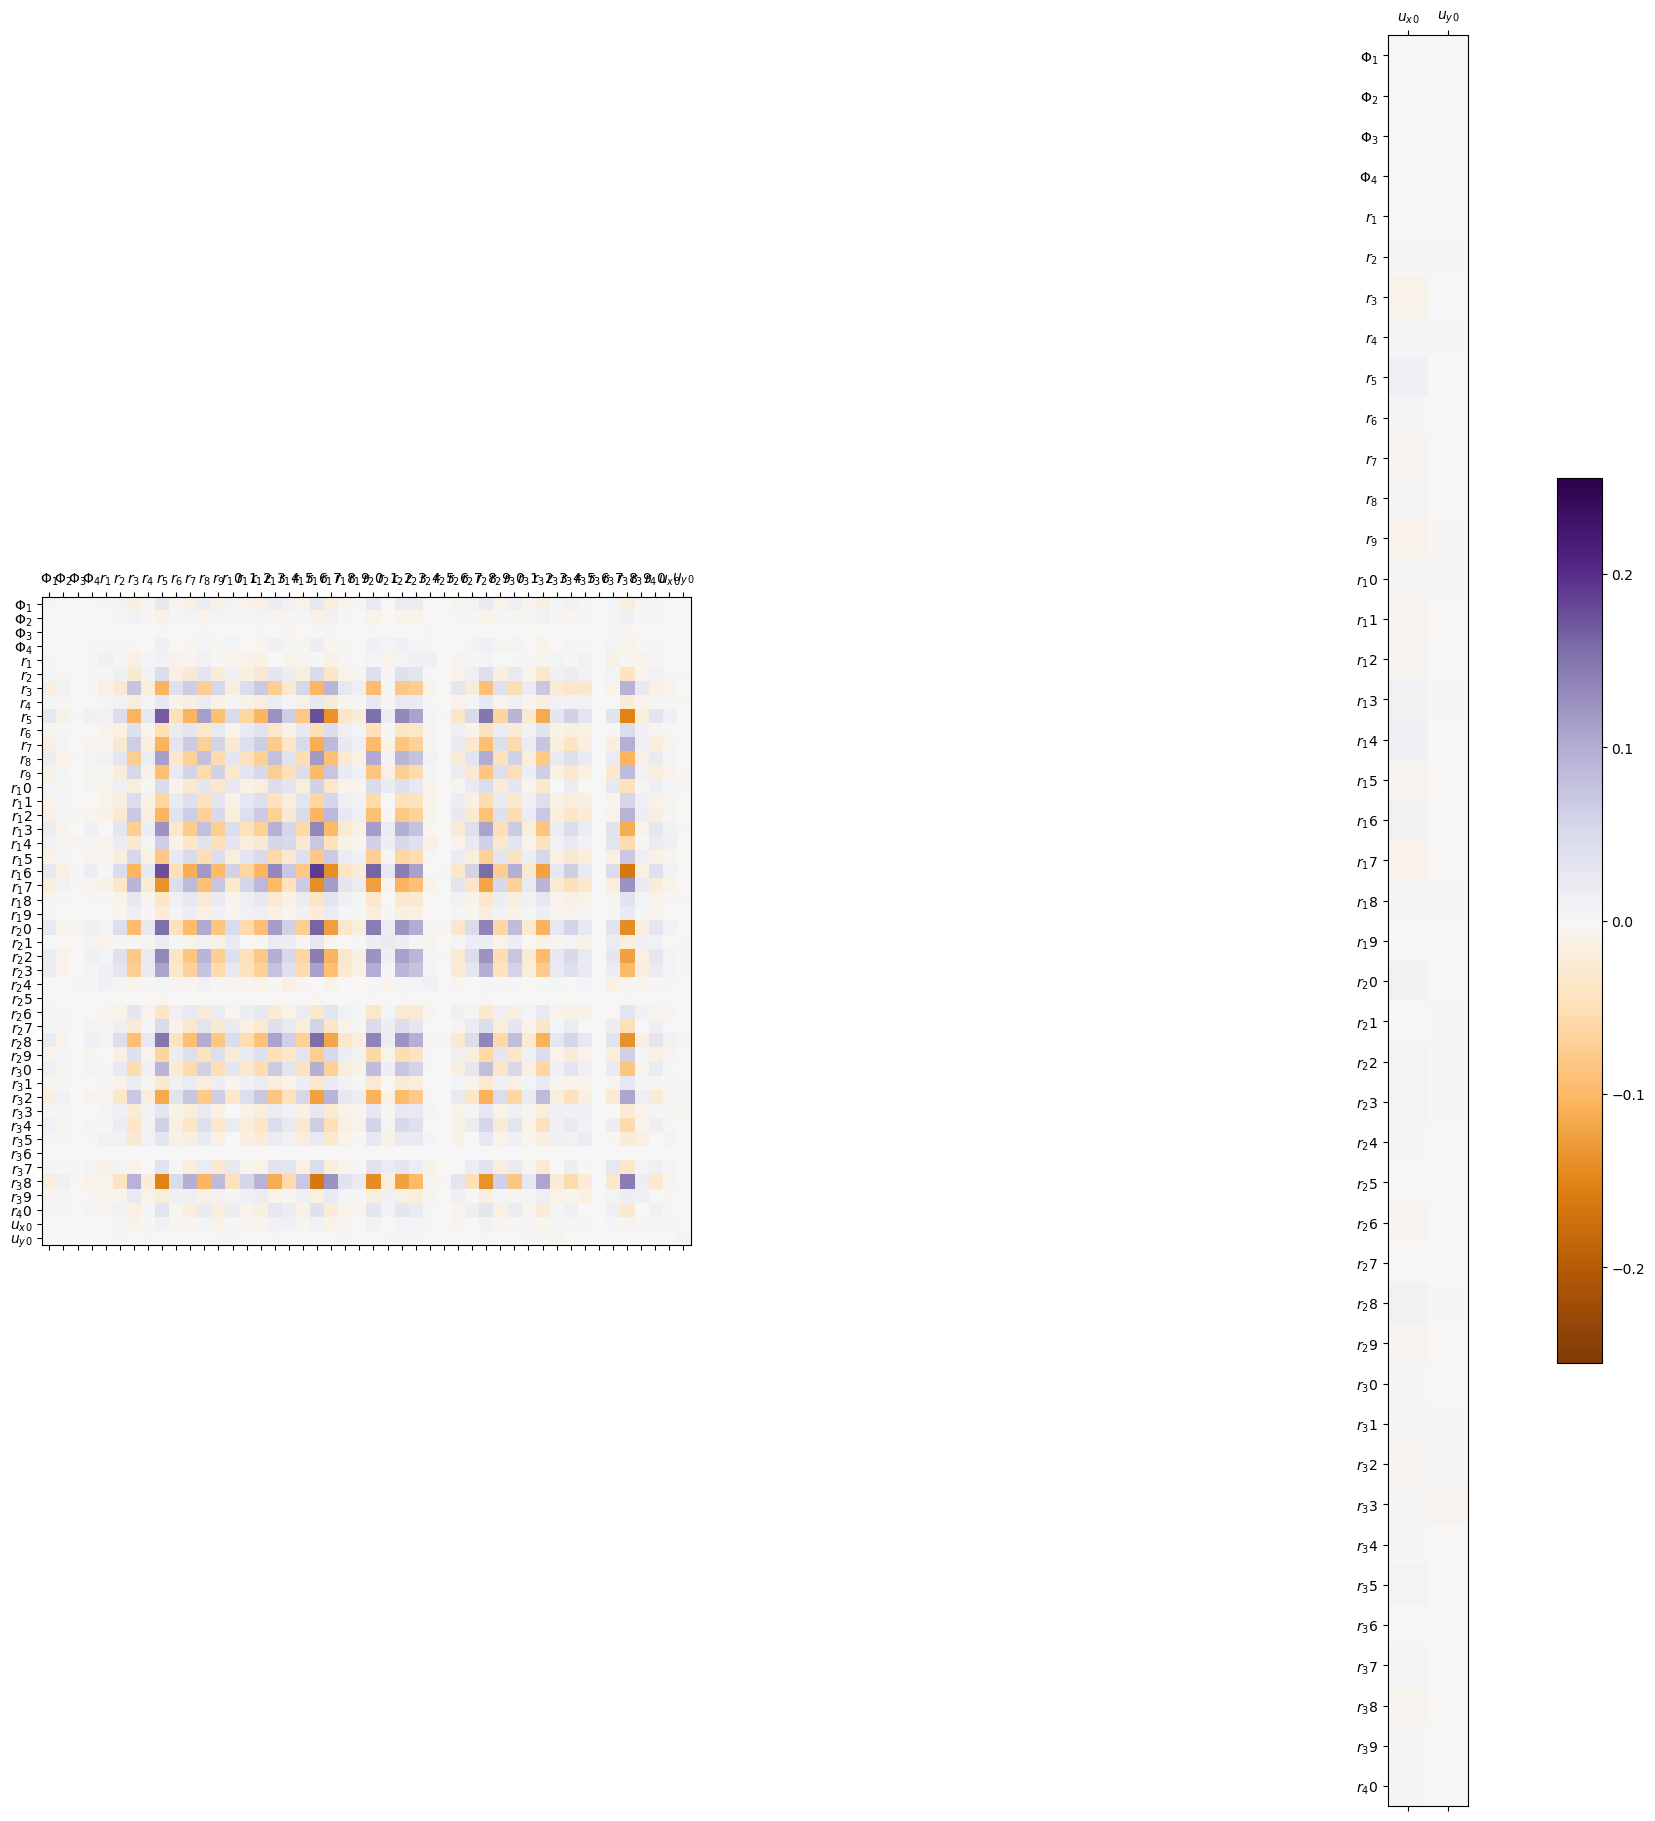

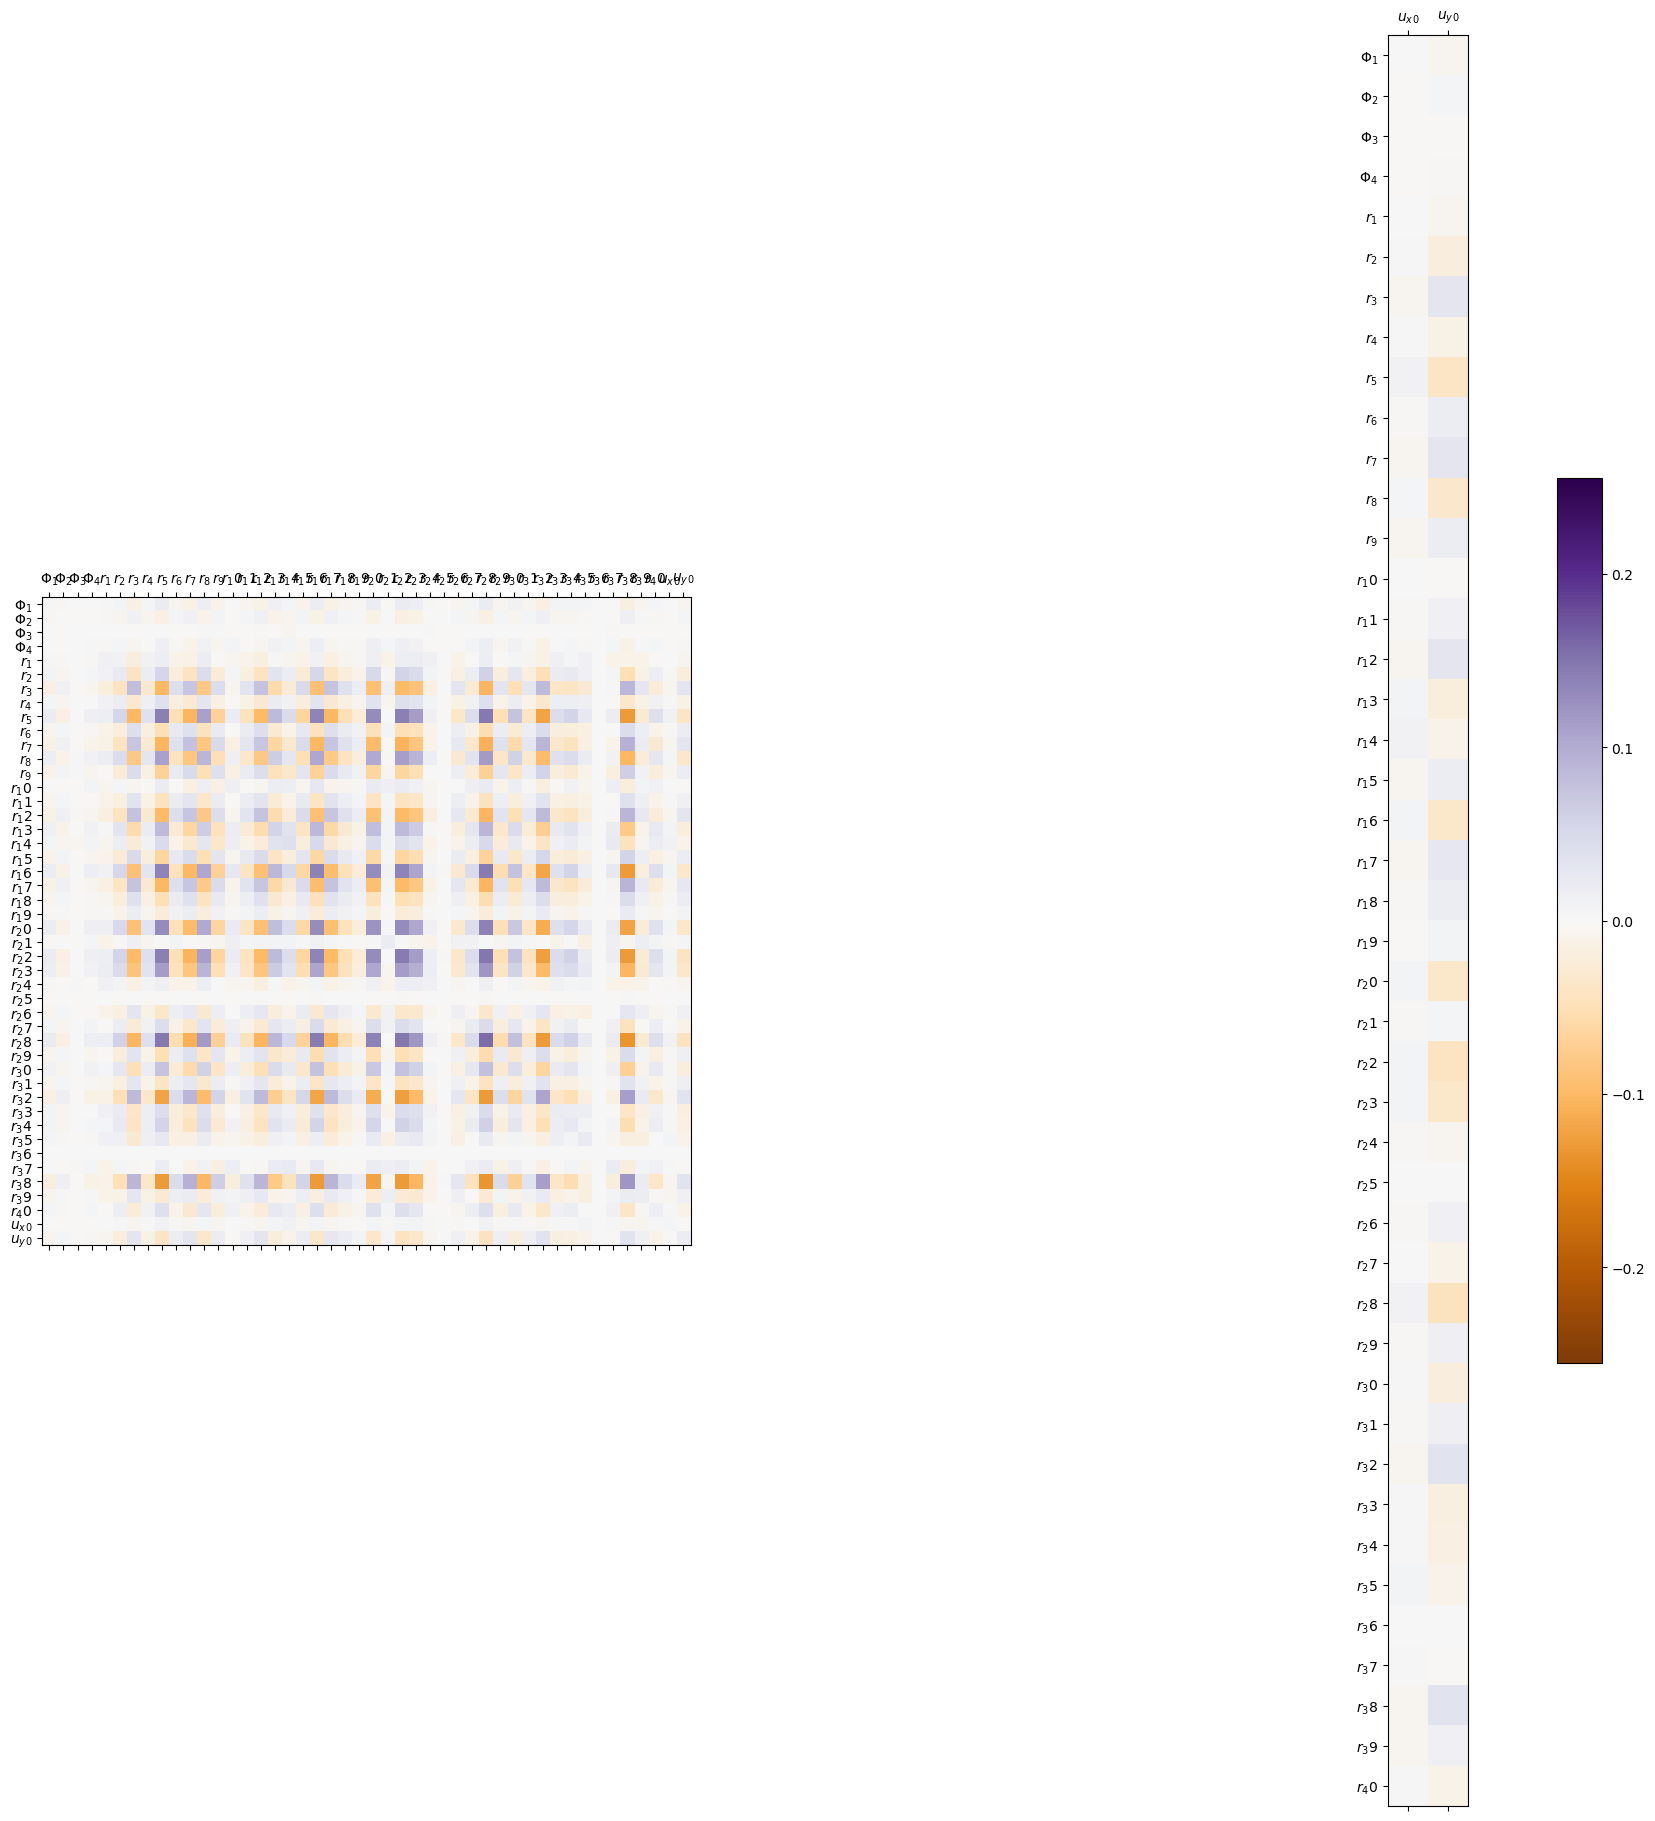

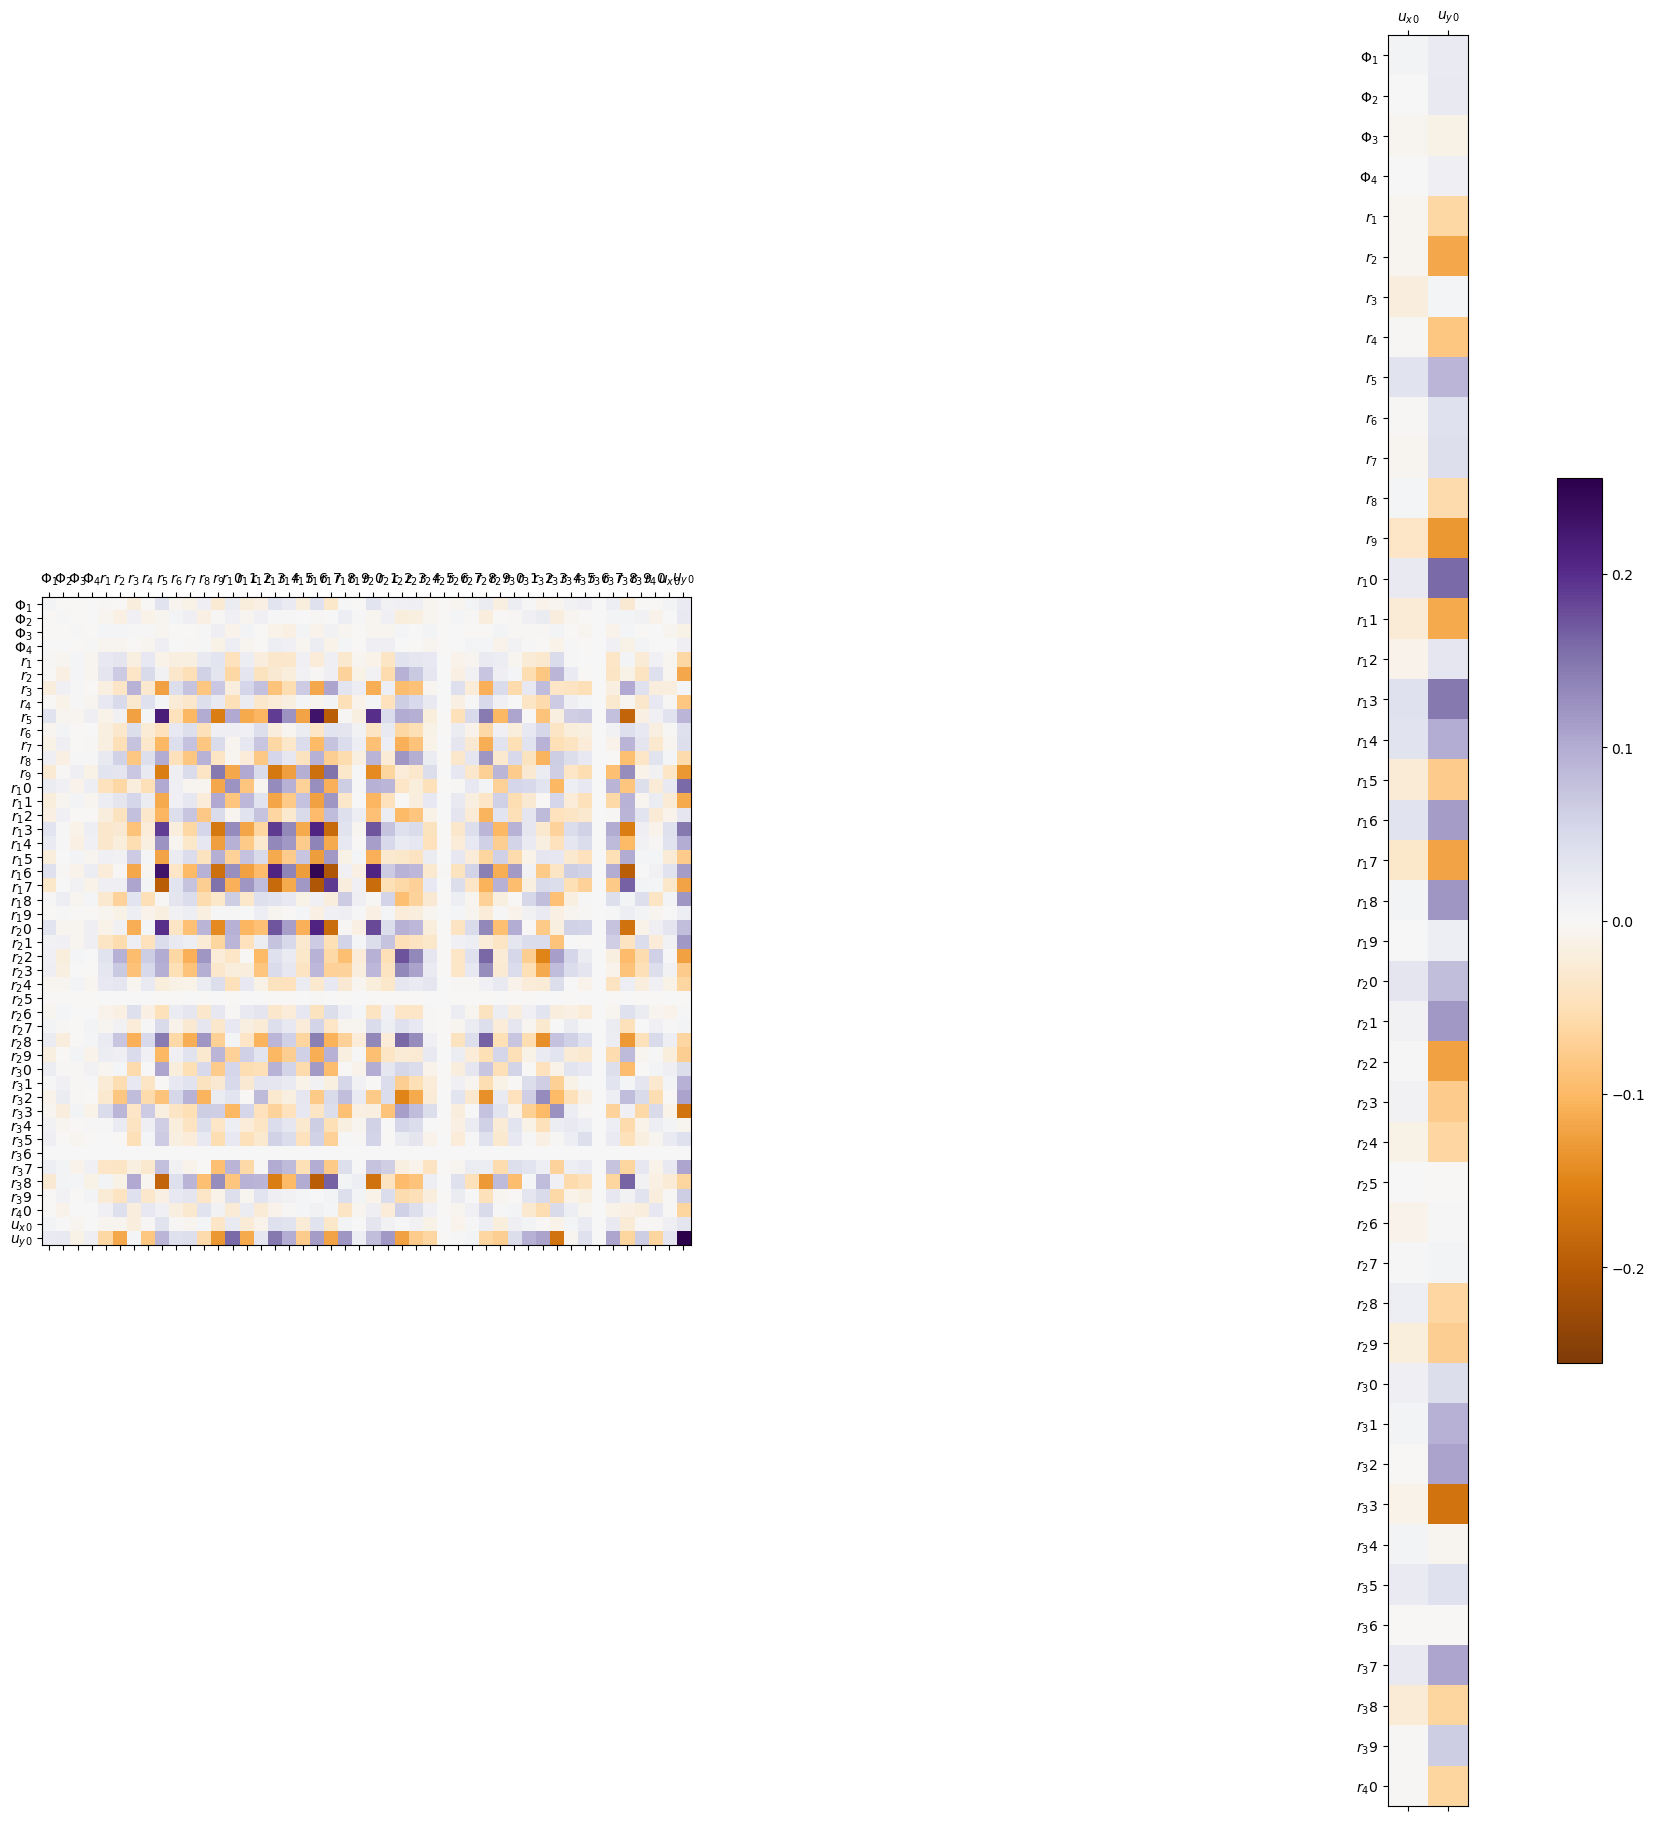

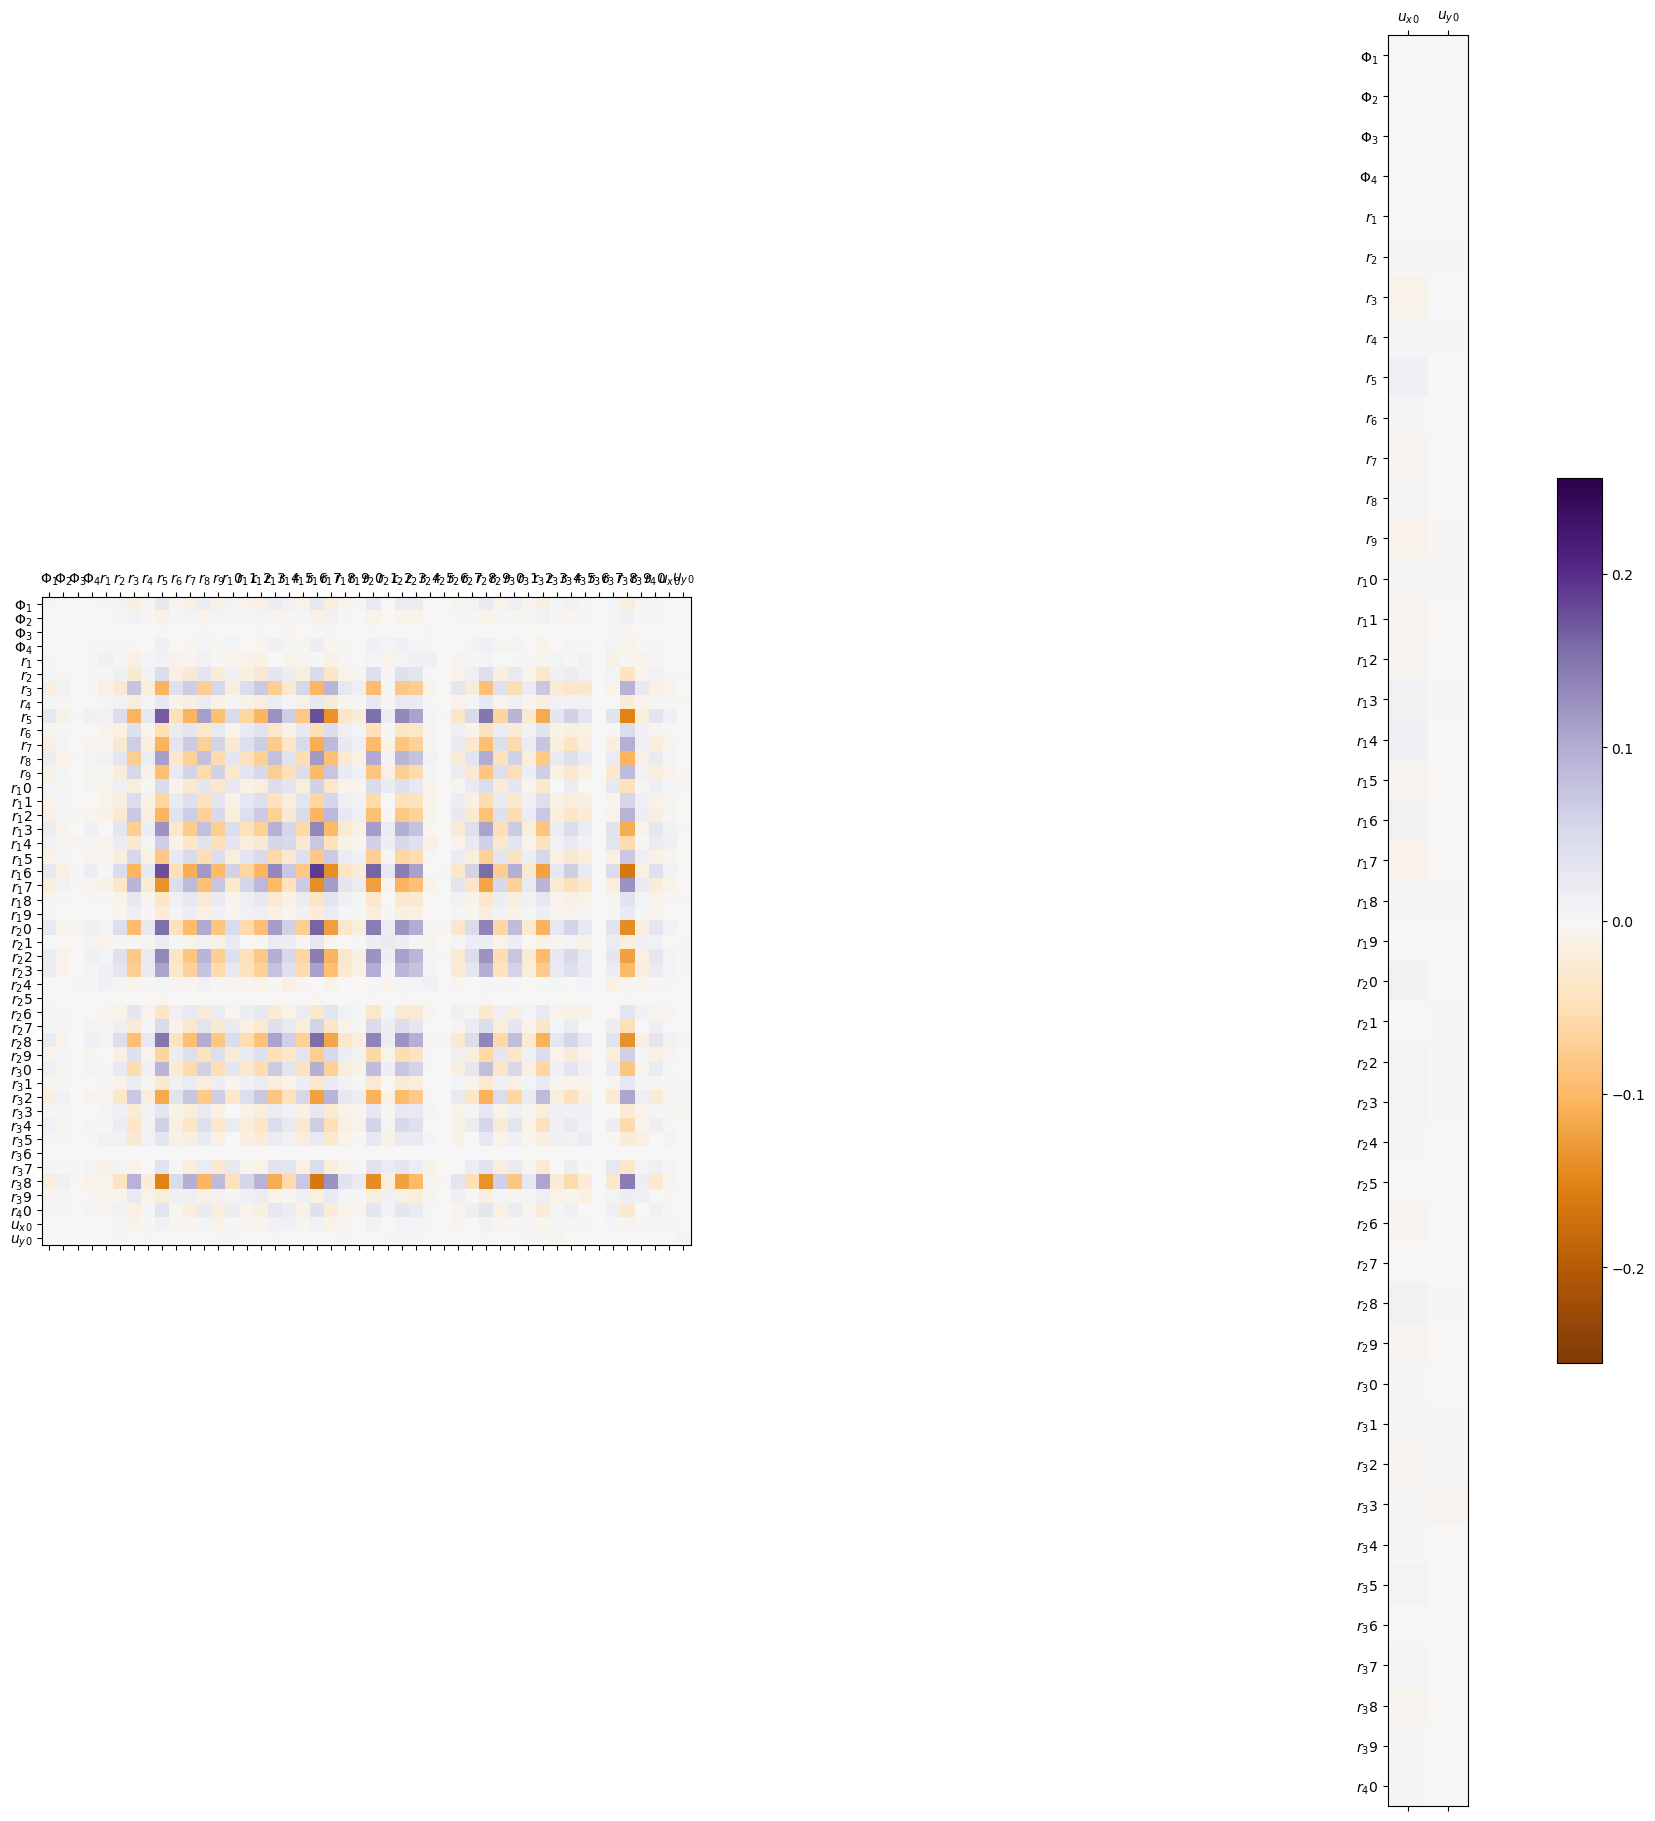

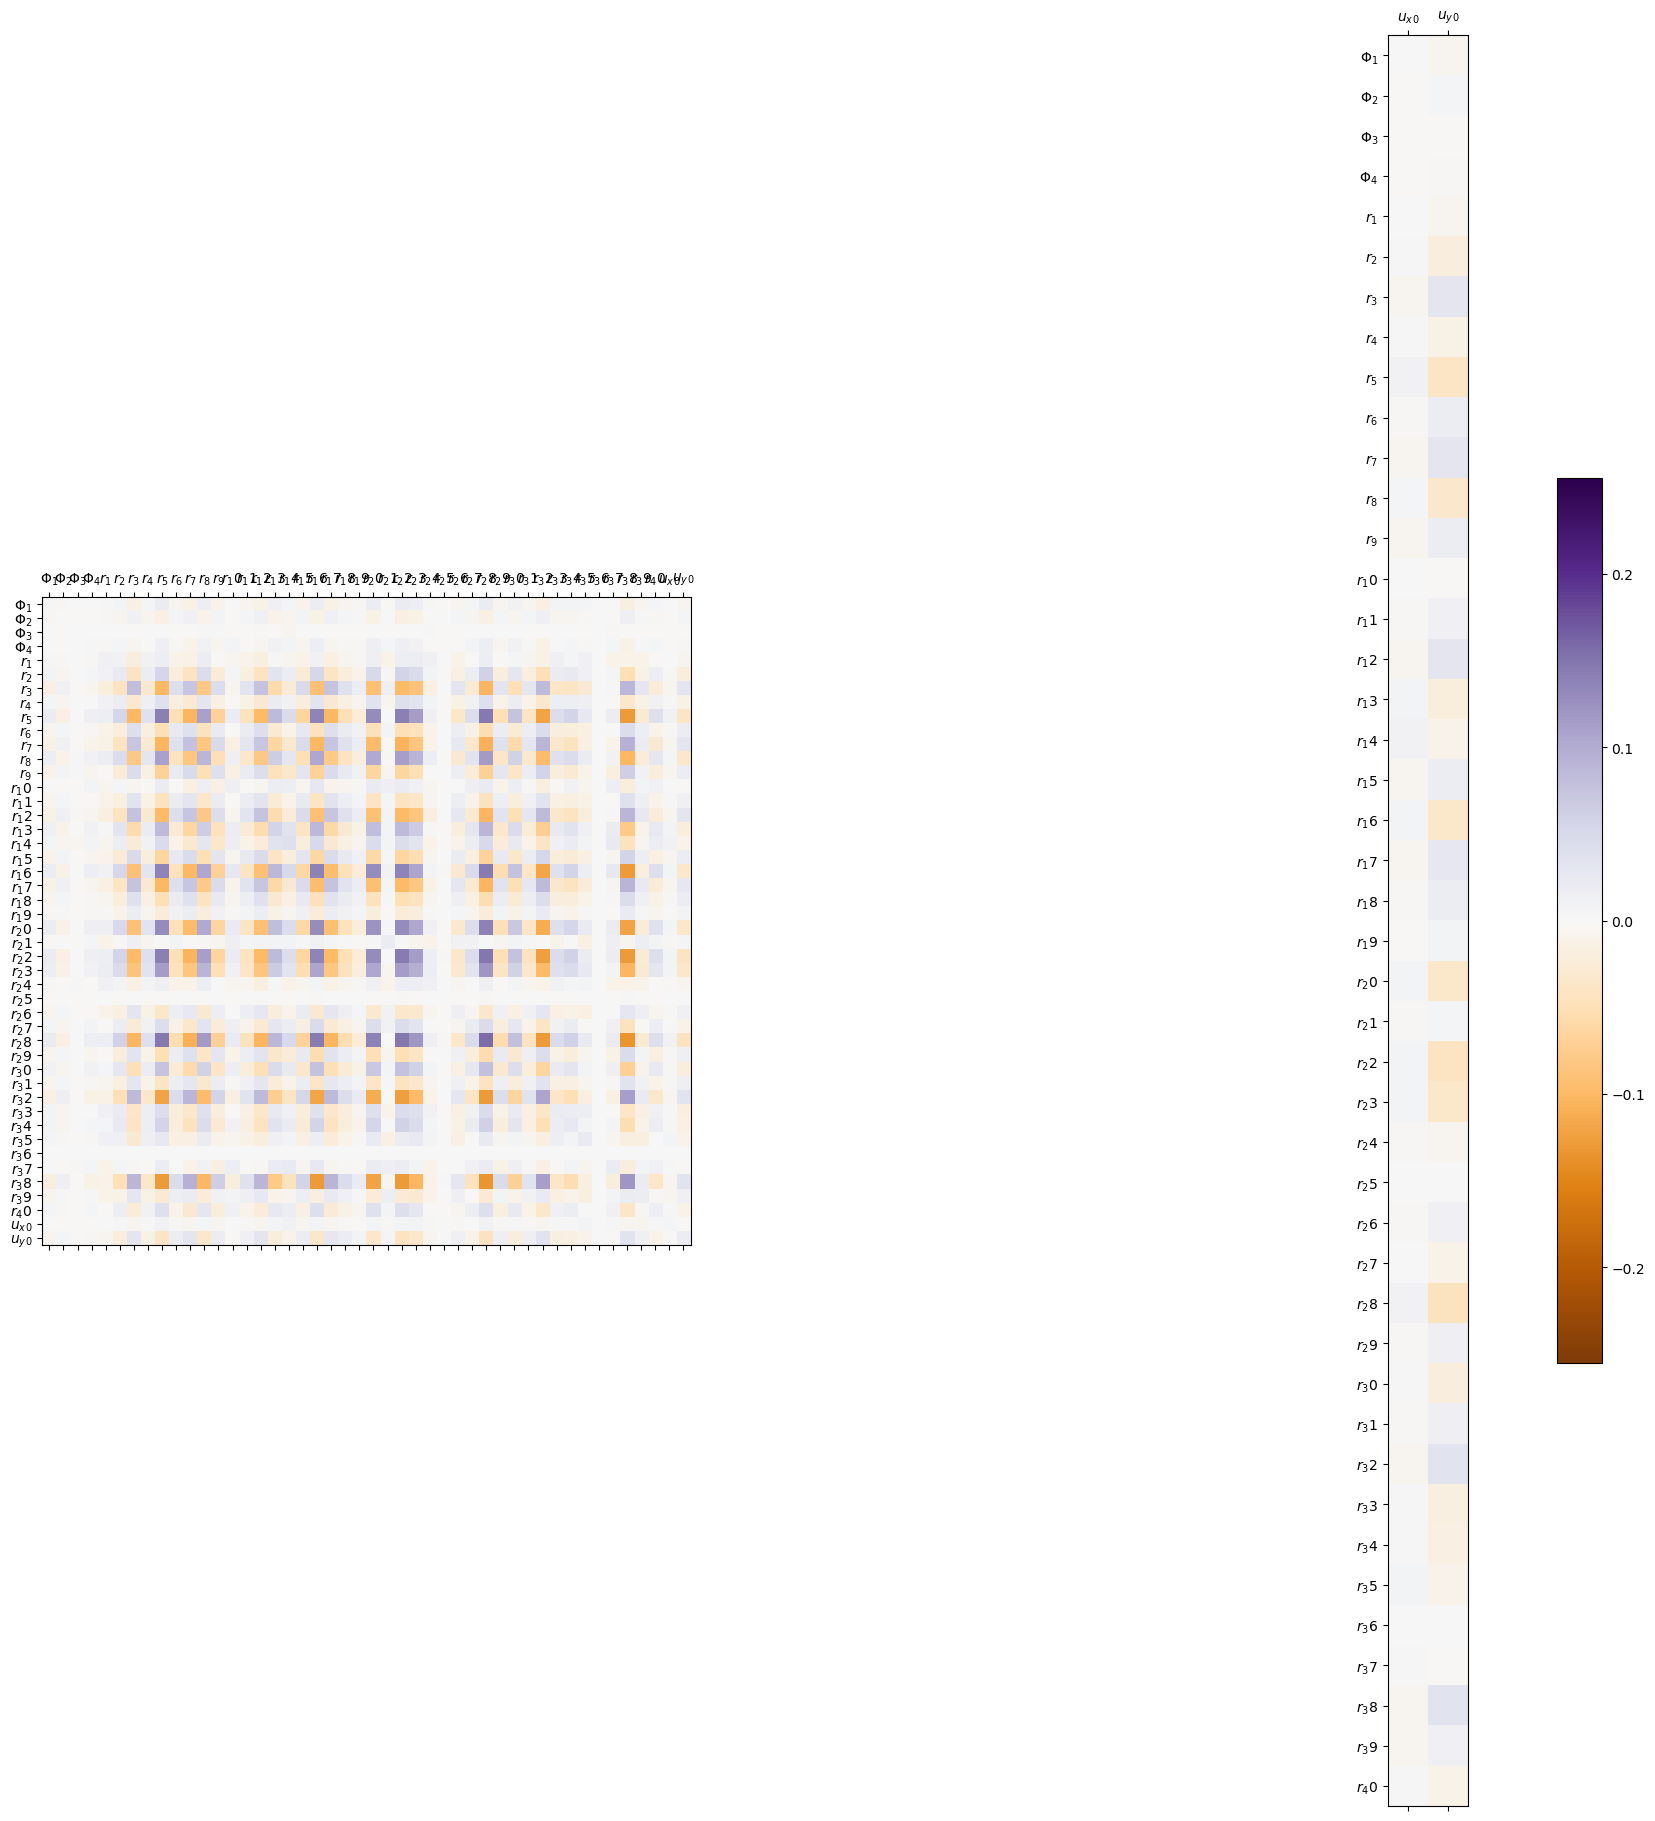

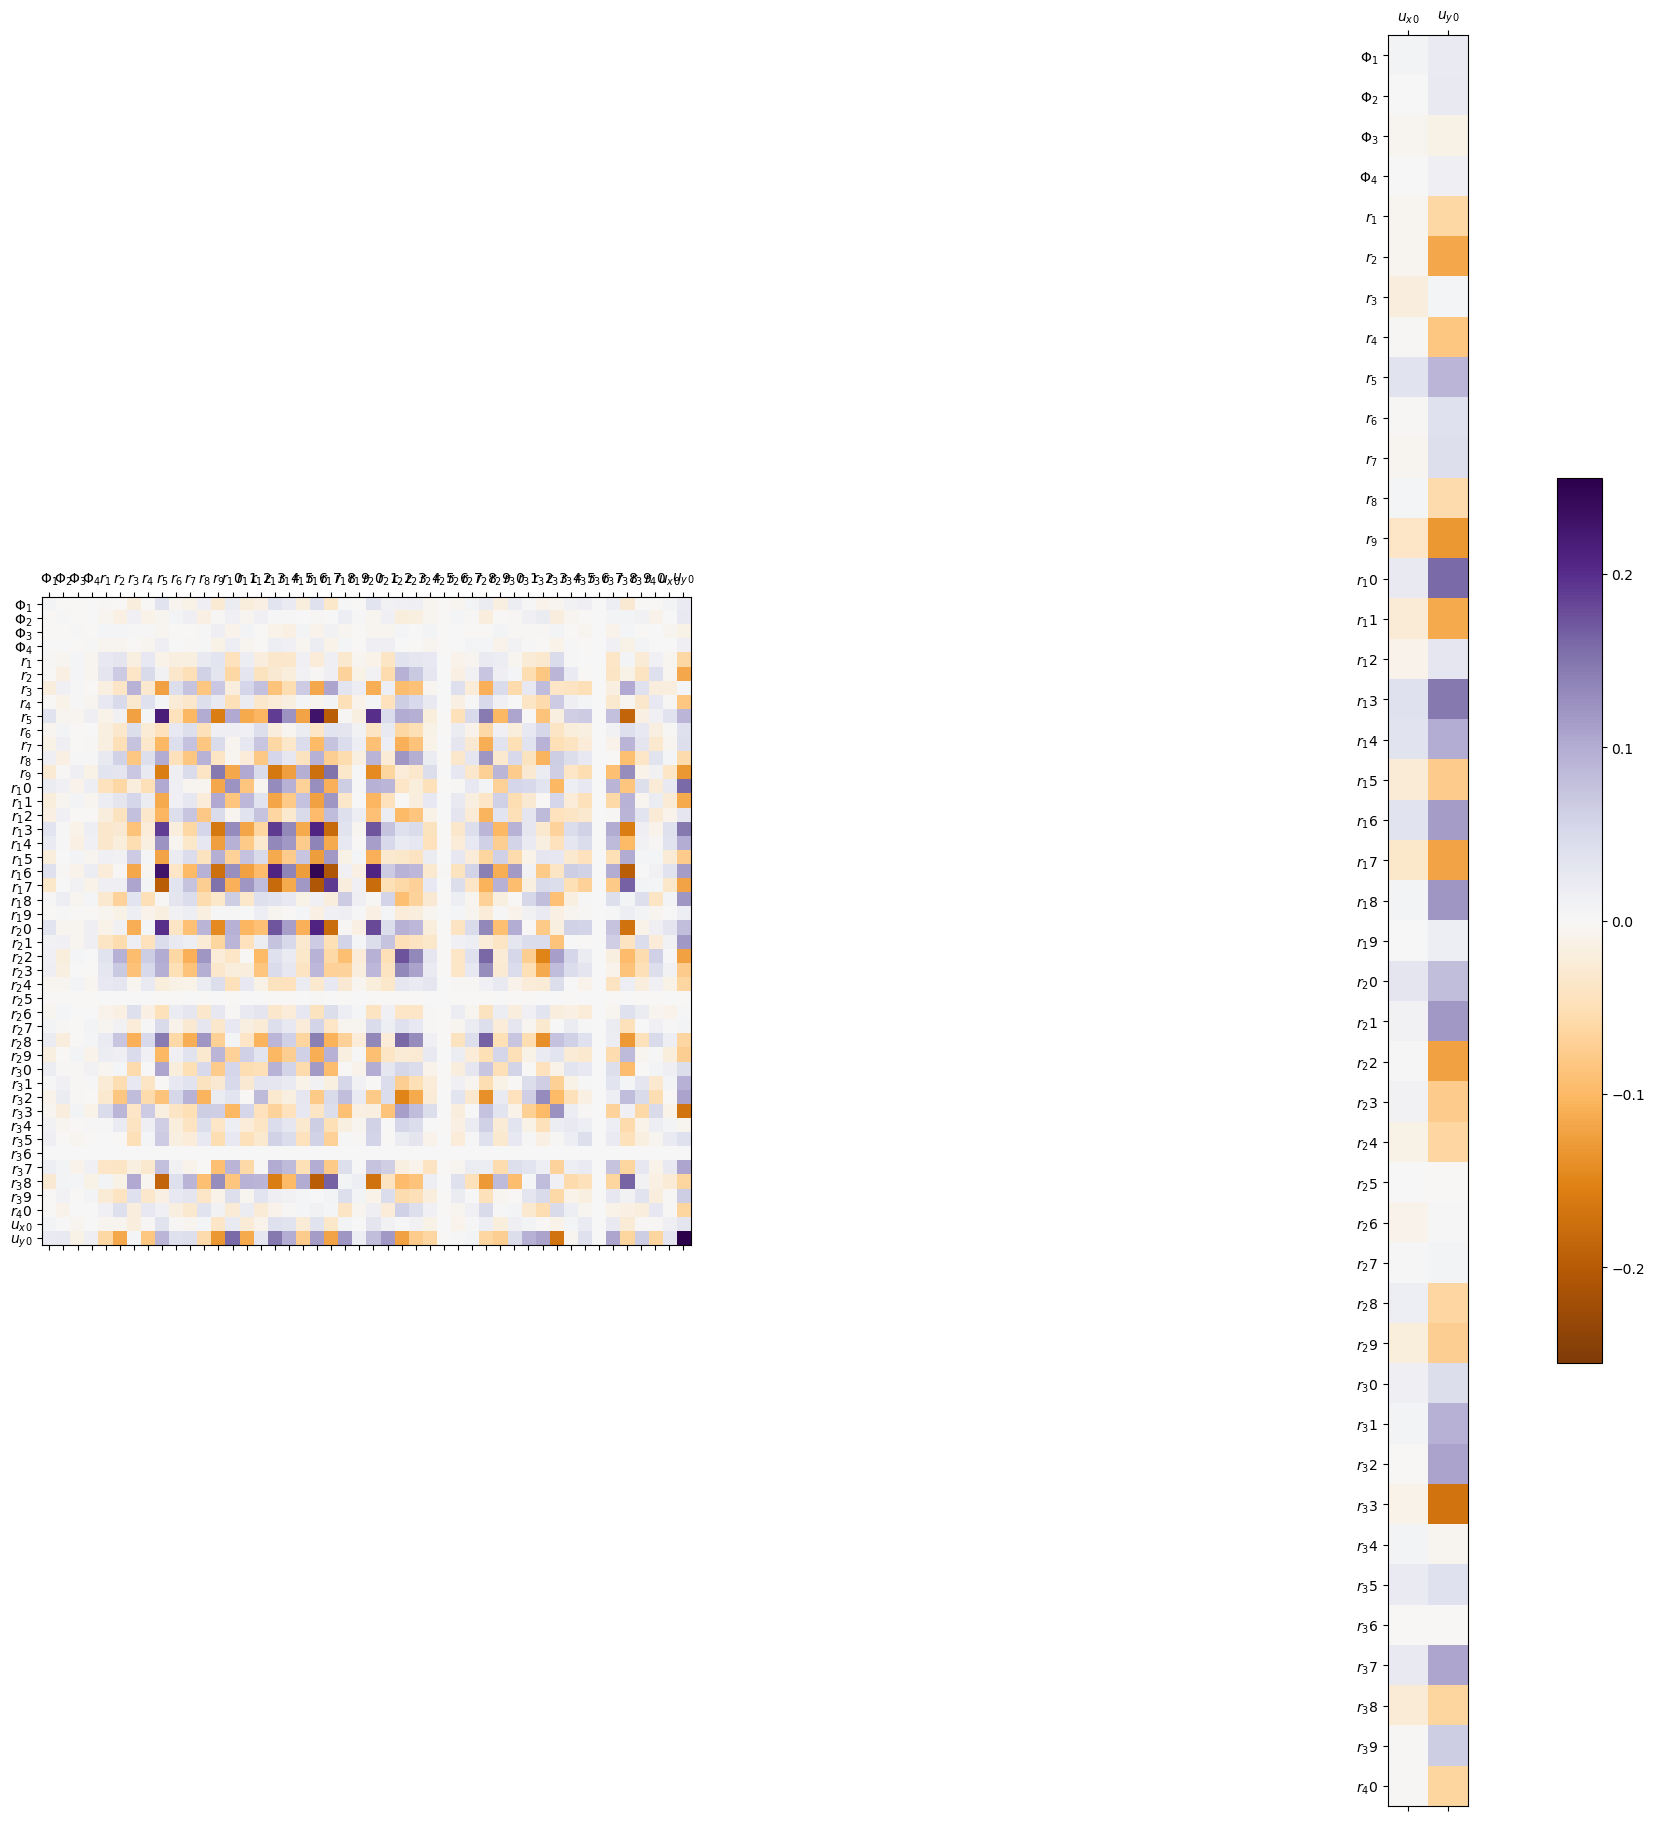

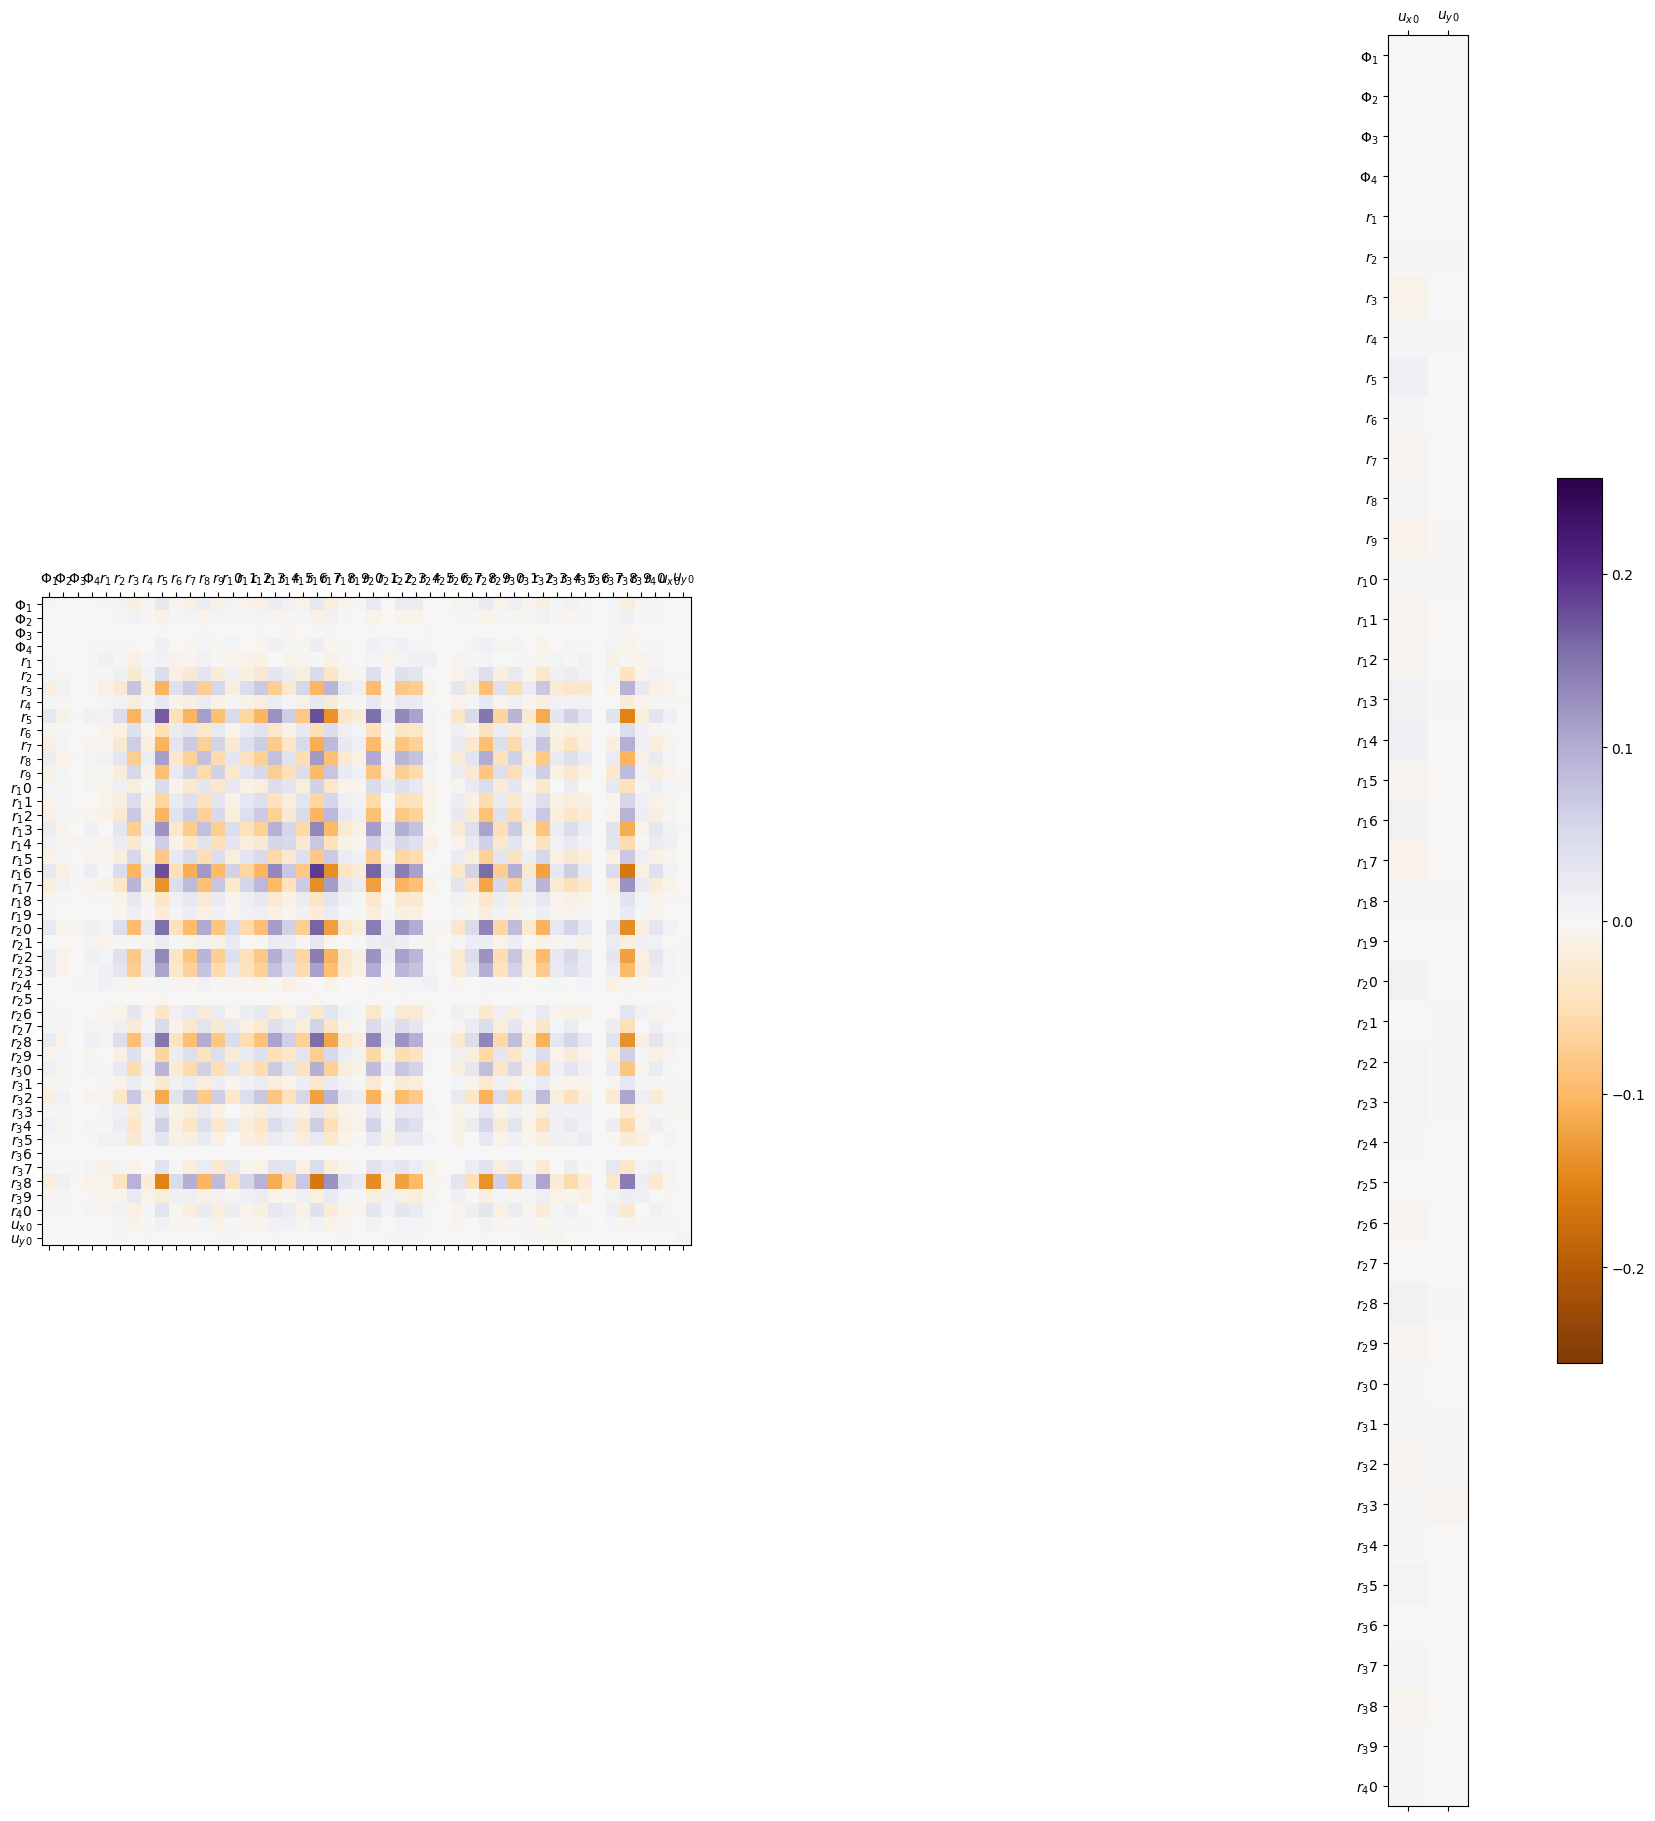

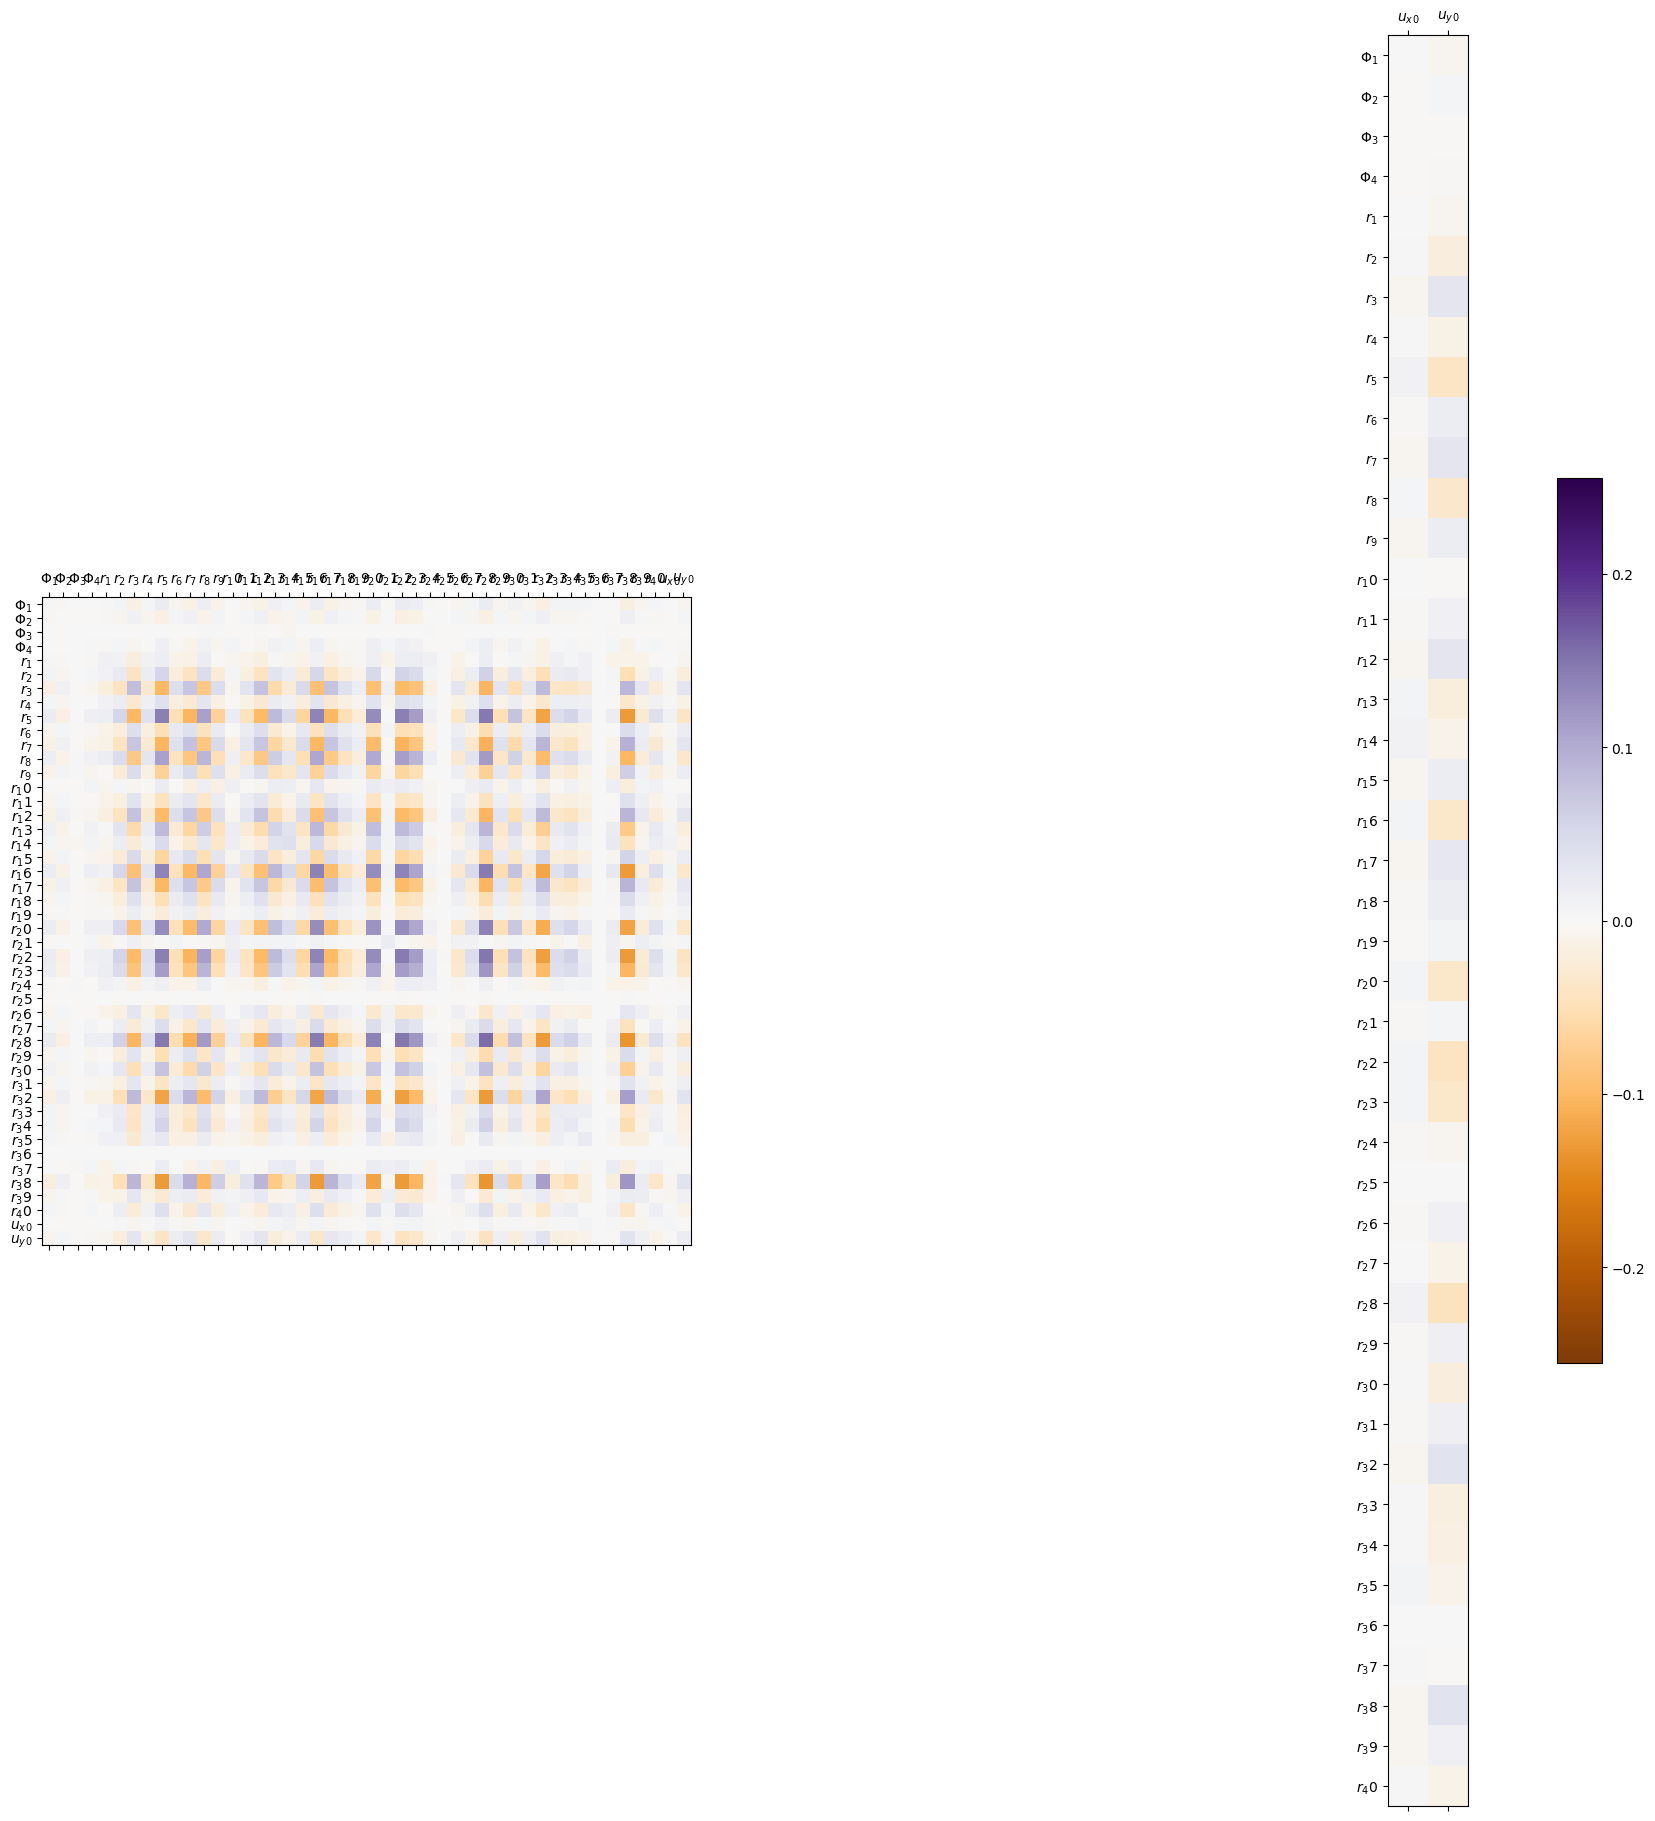

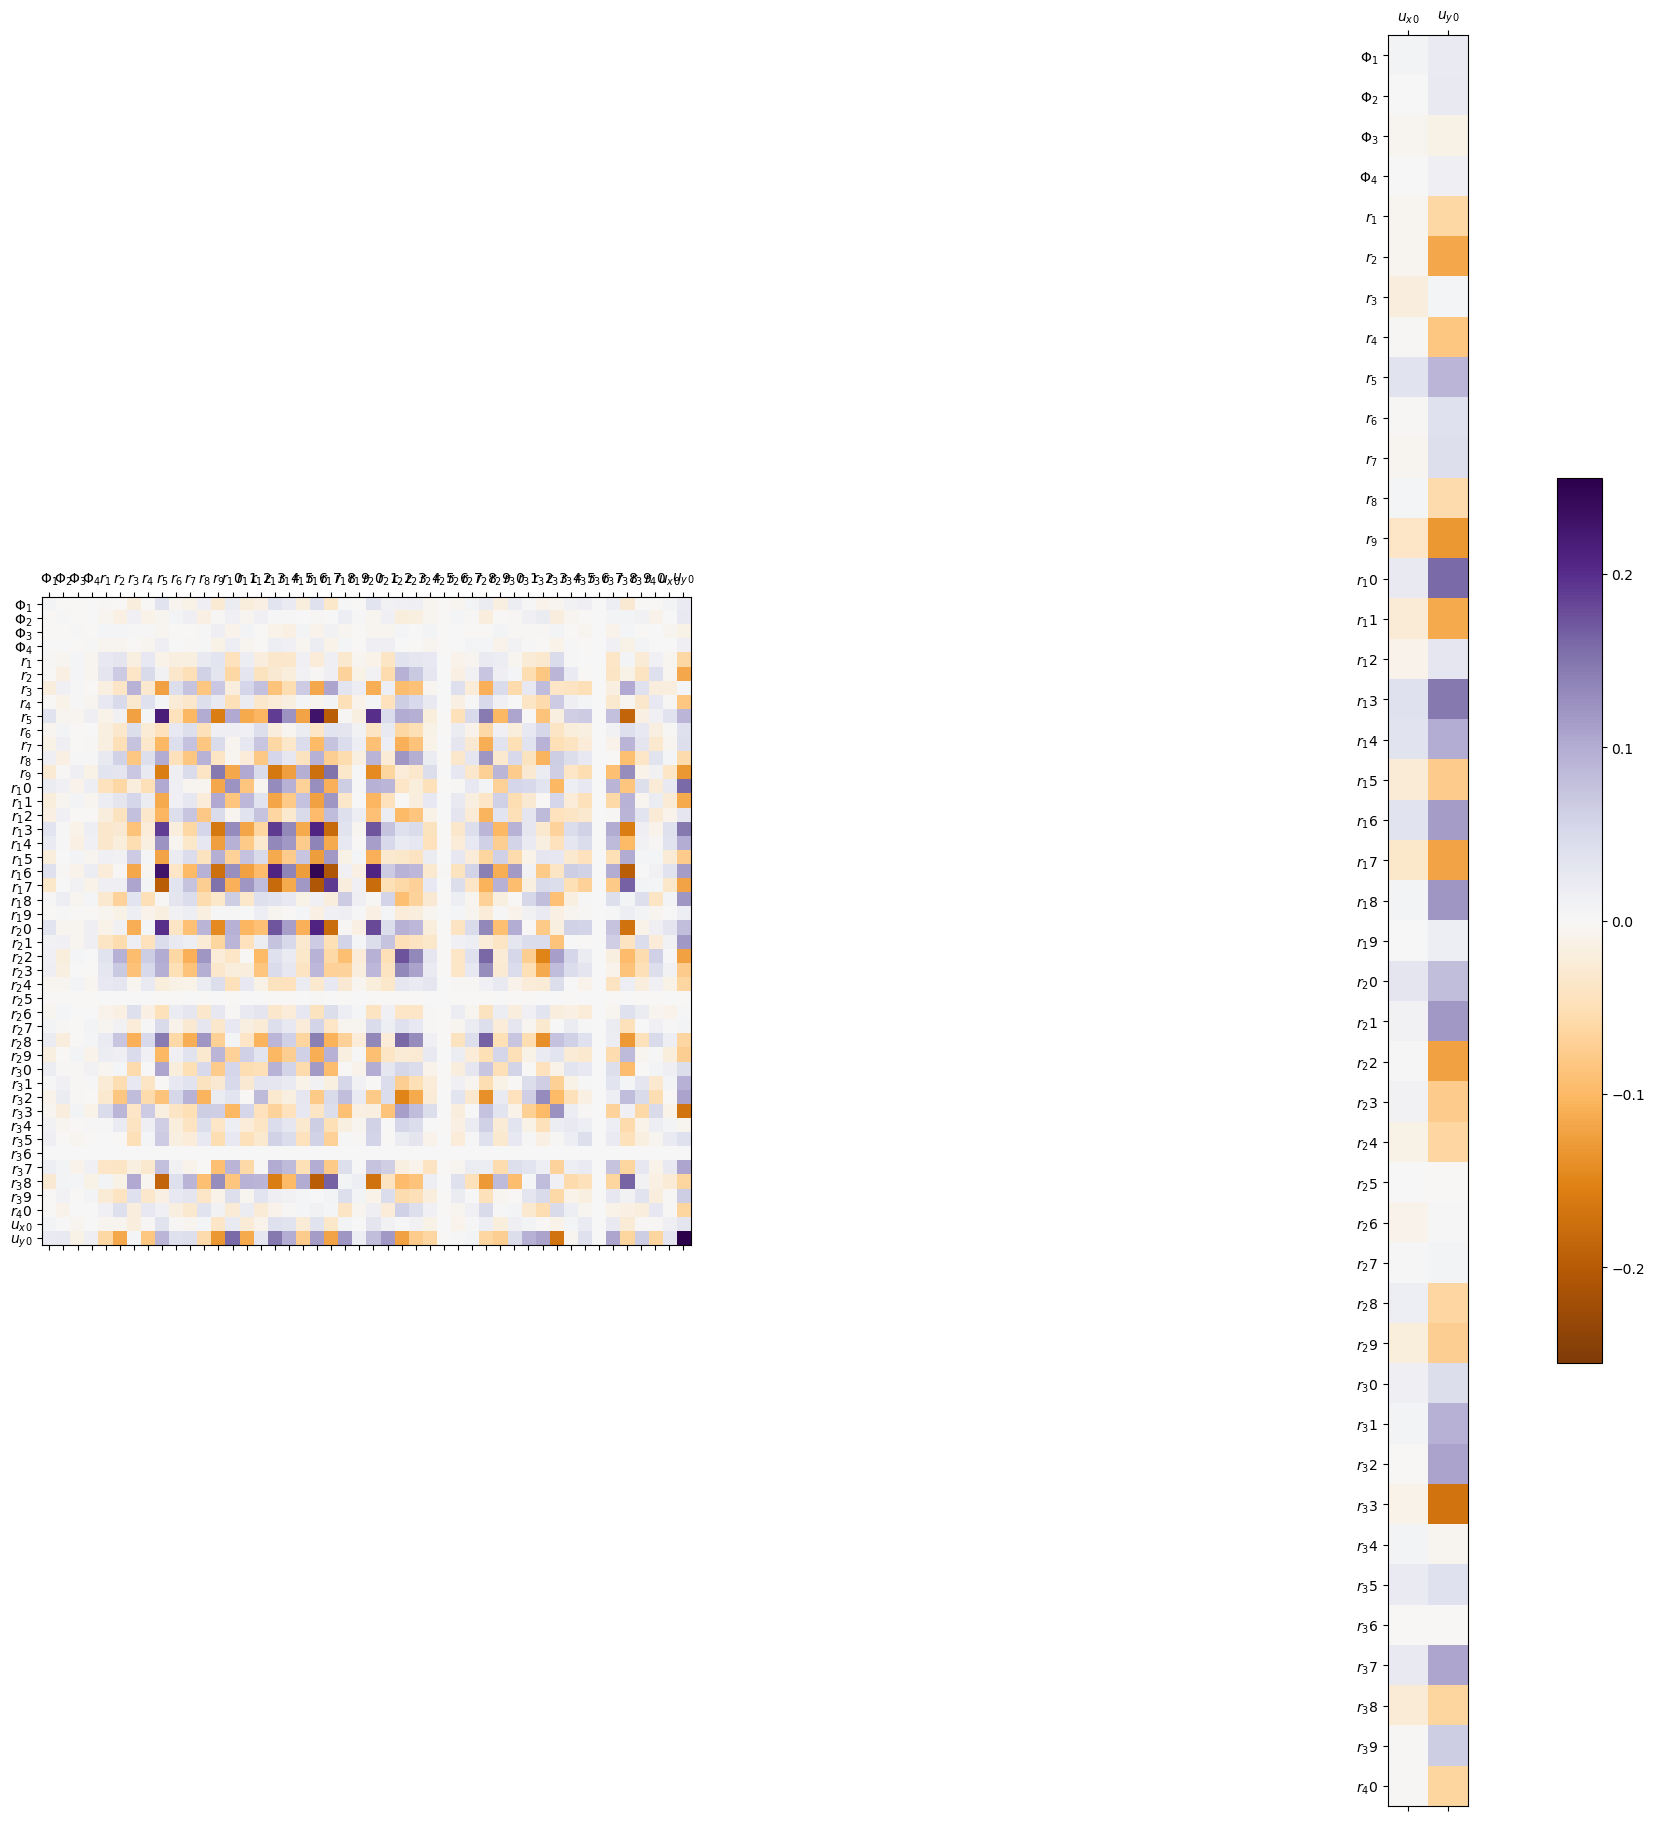

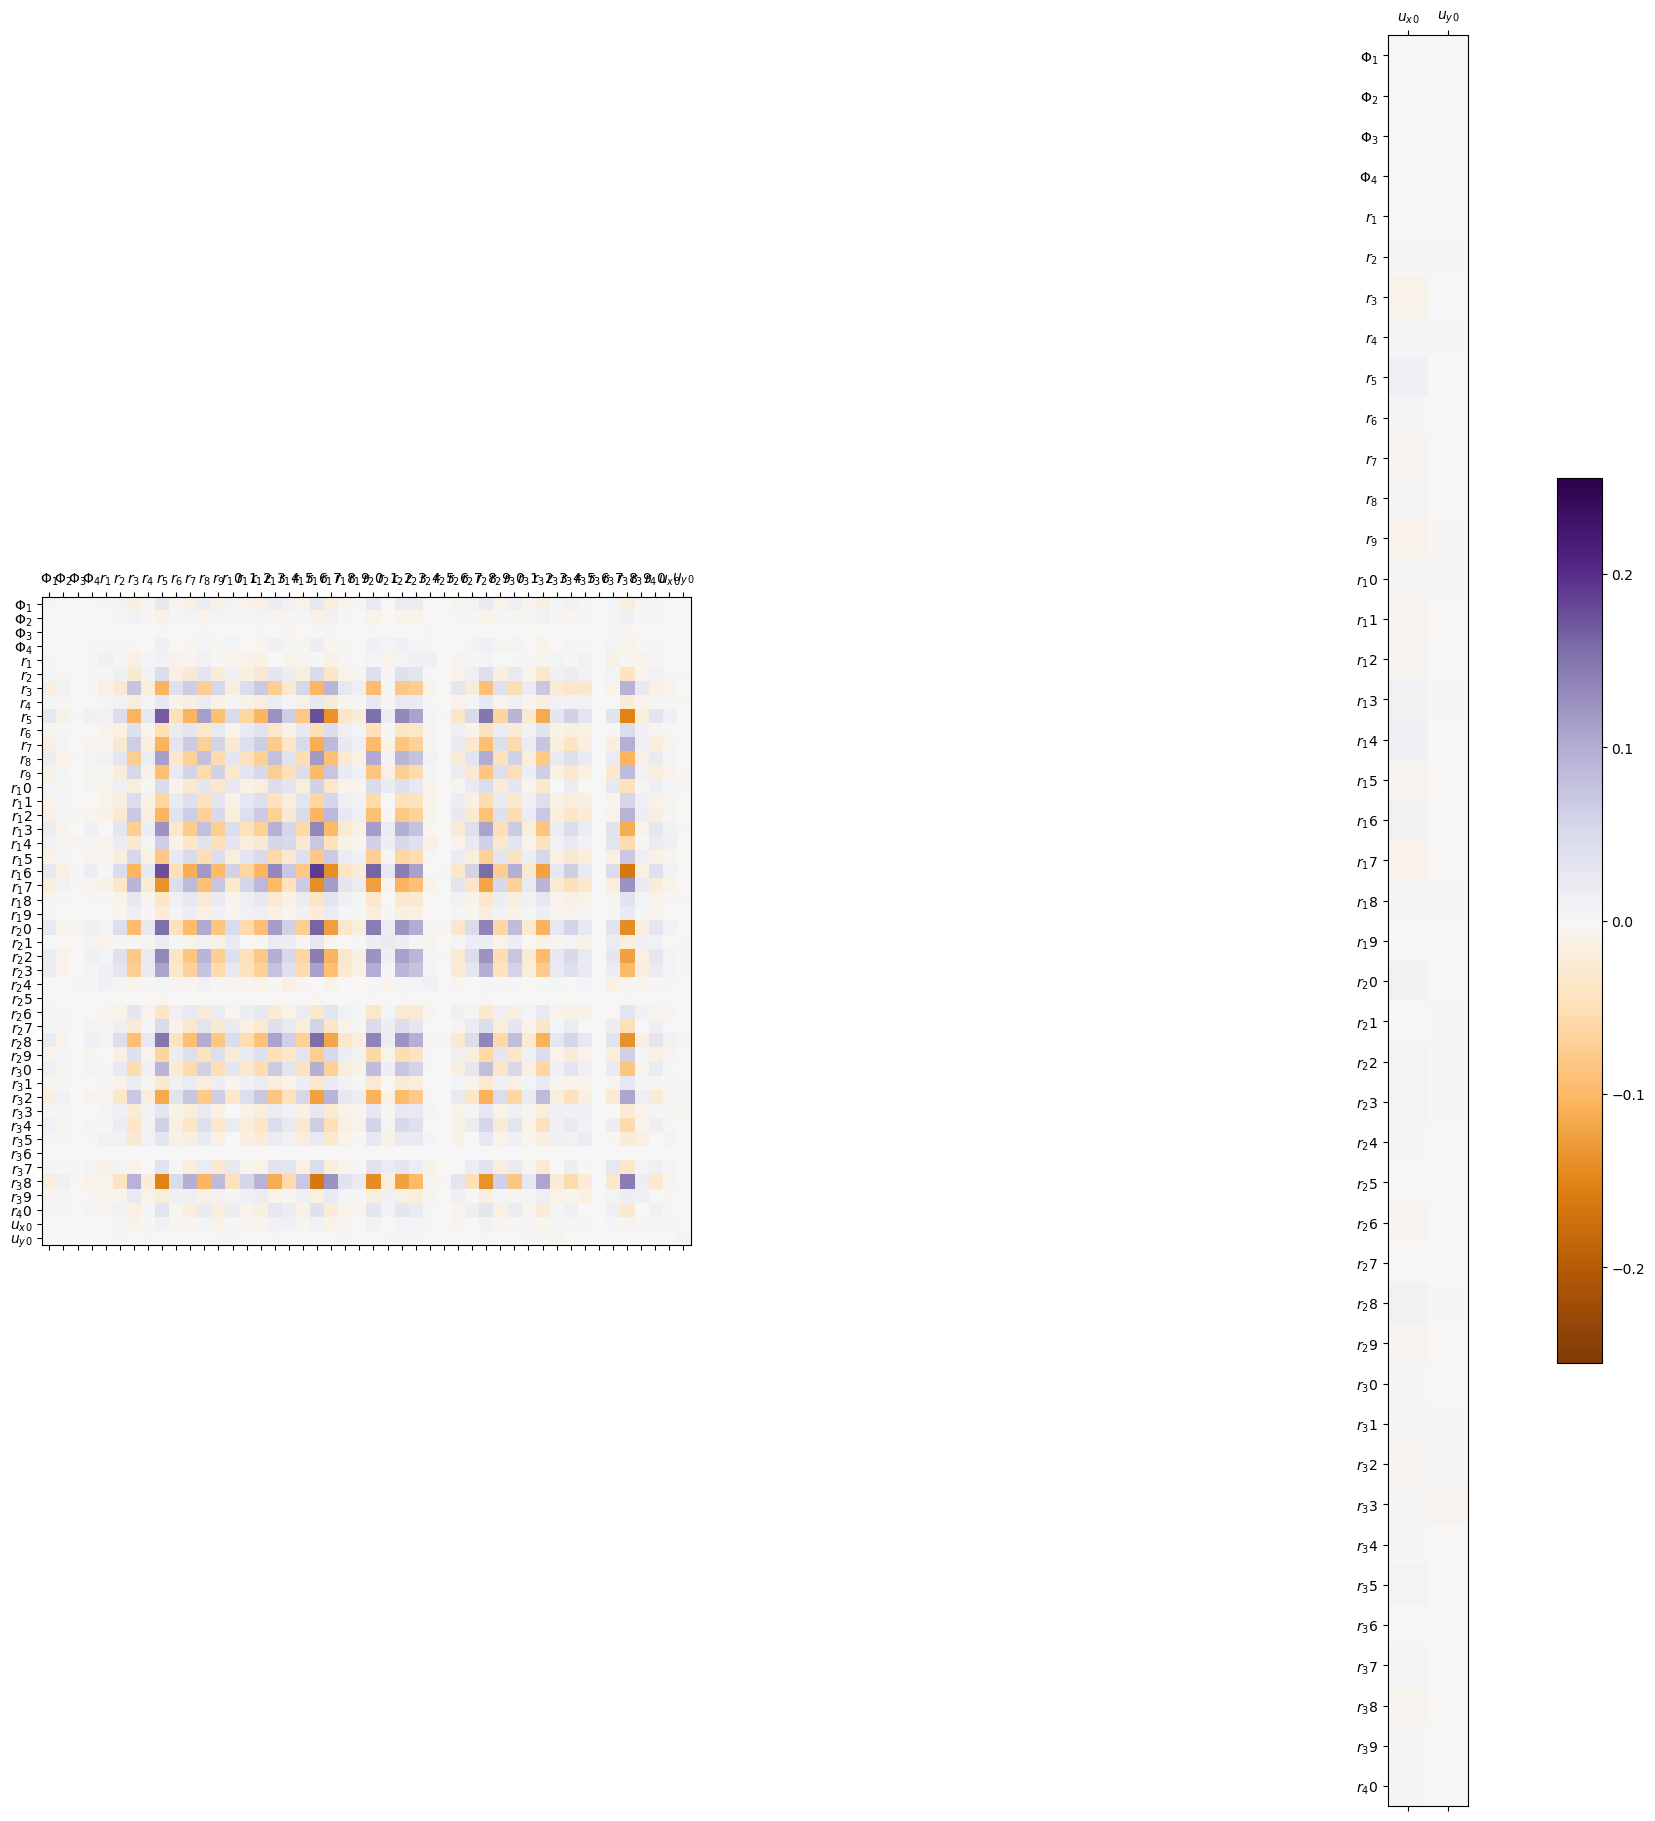

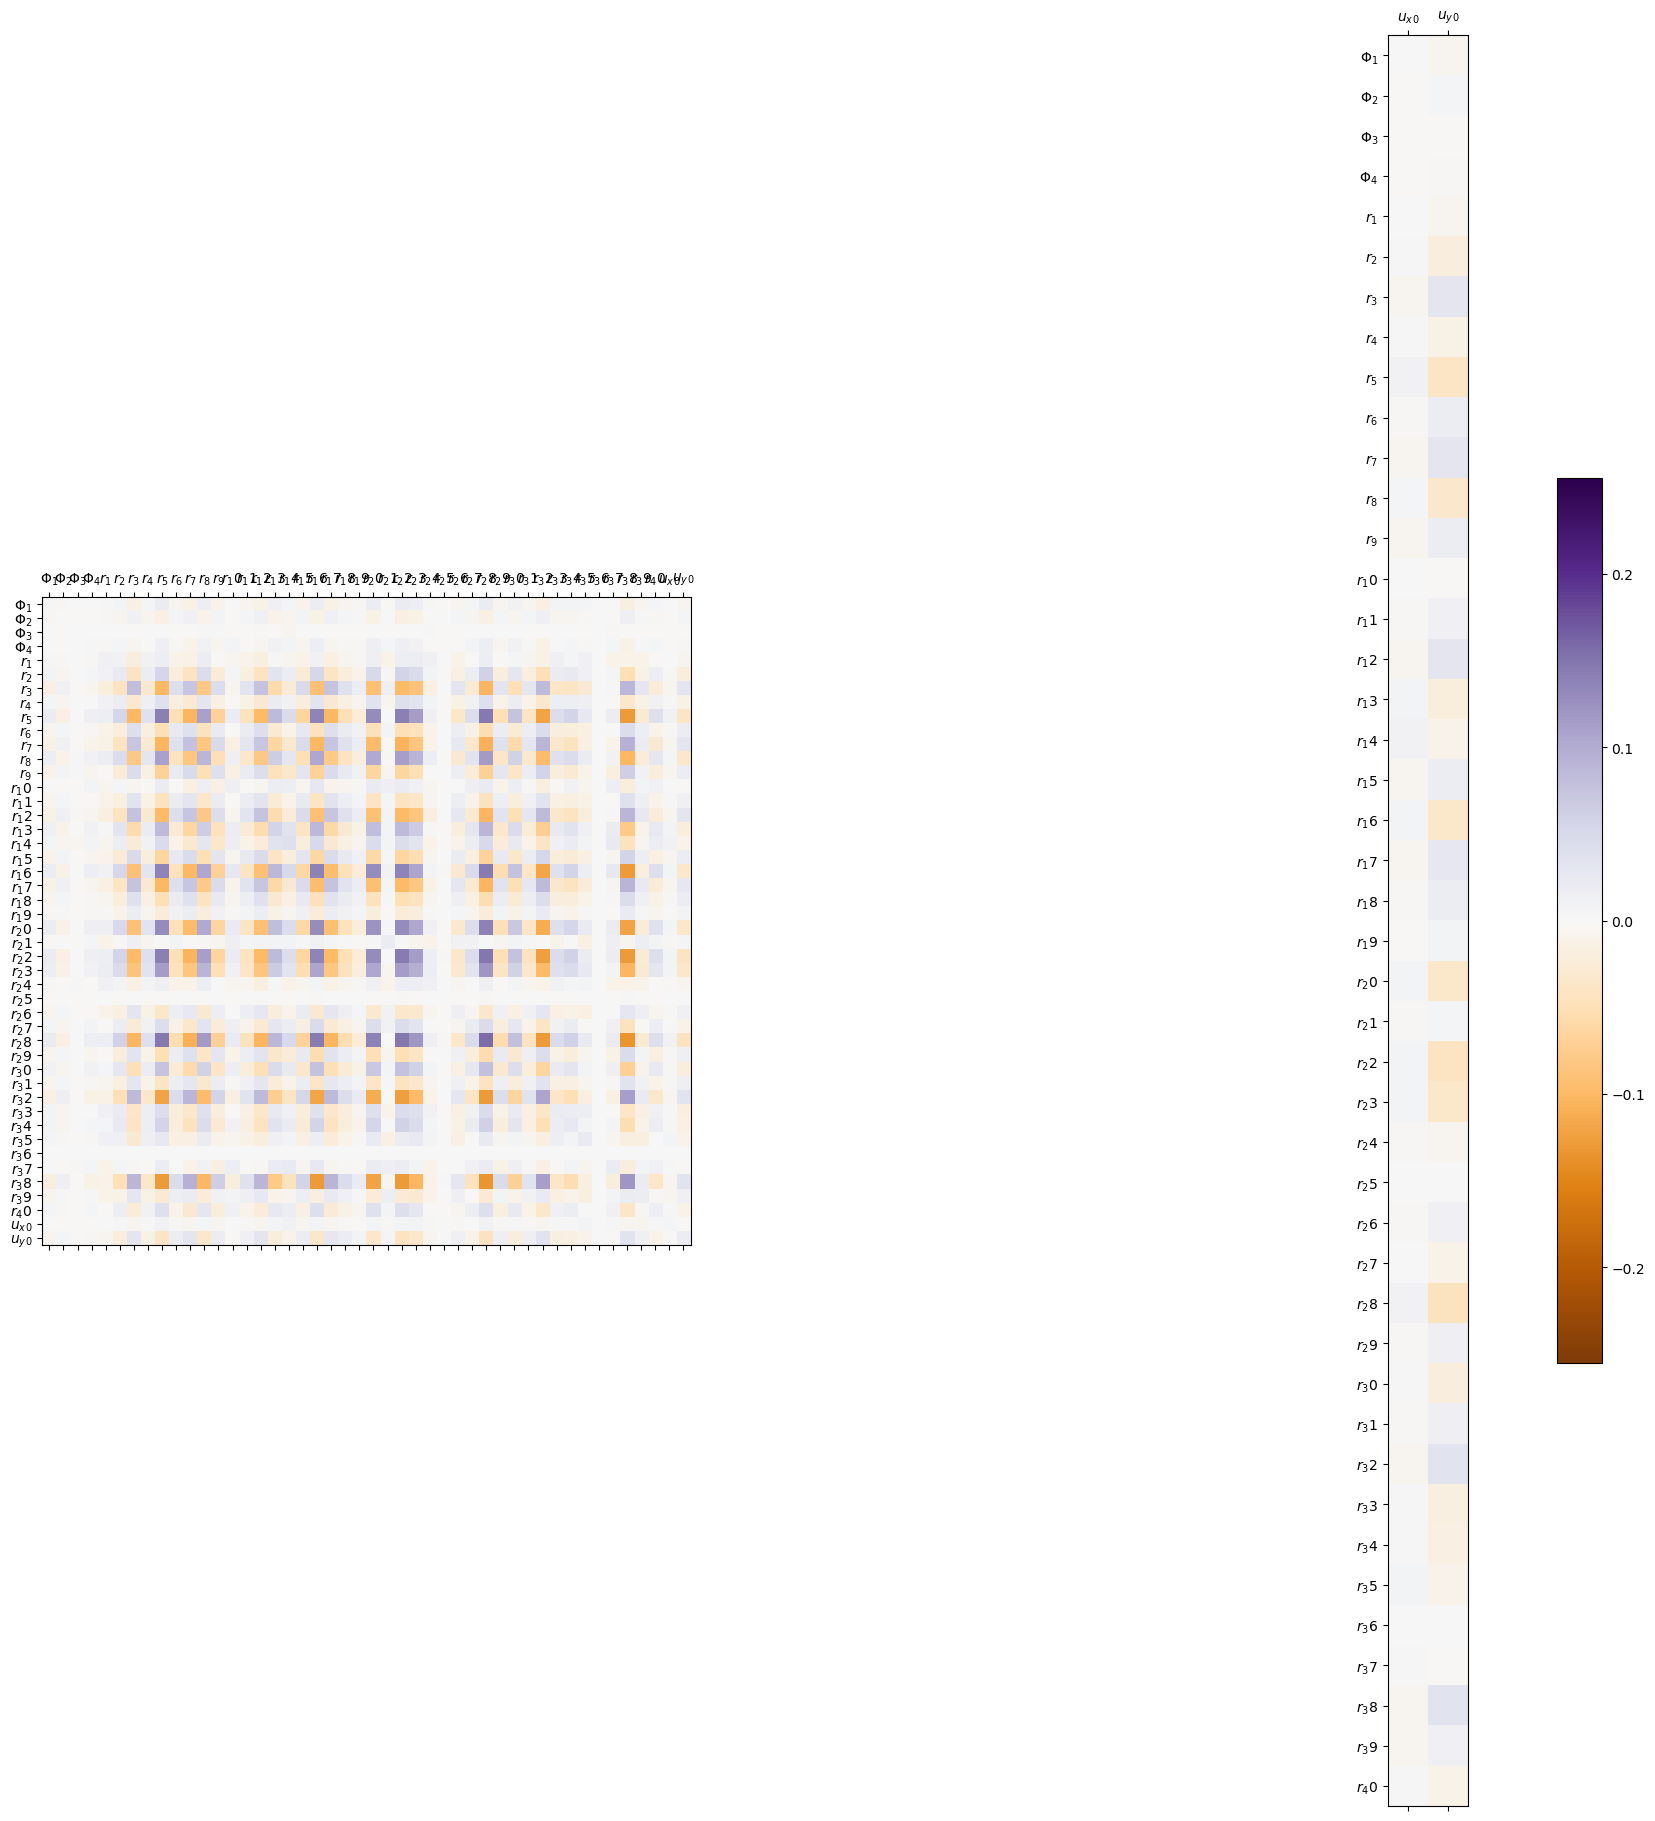

In [11]:
t_hist = filter_ens.hist_t
t_obs = truth['t_obs']

obs_idx = np.searchsorted(t_hist, t_obs)



for nq in range(5):

    file = f'{results_folder}{data_name}{run_name}Nq_{nq}/results'
    _ens = load_from_pickle_file(file)[0]

    forecast_coefficients = _ens.get_POD_coefficients(Nt=0)
    reconstructed_data = _ens.reconstruct(Phi=np.mean(forecast_coefficients, axis=-1))

    all_reconstructed_data.append(reconstructed_data)
    labels.append(f'N_sensors = {_ens.N_sensors}')

    plot_covariance(_ens, idx=obs_idx[-1]-1)
    plt.suptitle(f'N_sensors={_ens.N_sensors}')

save_figs_to_pdf(f'{results_folder}{data_name}{run_name}Cpps.pdf')